In [1]:
# import numpy as np
# import matplotlib.pyplot as plt

# class DiscreteSignal:
#     def __init__(self, values=None):
#         self.values = np.array(values, dtype=float) if values is not None else np.array([])

#     def set_value_at_time(self, time, value):
#         if time >= len(self.values) or time < 0:
#             extend_size = max(0, time + 1 - len(self.values))
#             self.values = np.append(self.values, np.zeros(extend_size))
#         self.values[time] = value

#     def shift_signal(self, shift):
#         if shift < 0:
#             return DiscreteSignal(np.append(np.zeros(-shift), self.values))
#         elif shift > 0:
#             return DiscreteSignal(self.values[shift:])
#         else:
#             return DiscreteSignal(self.values.copy())

#     def add(self, other):
#         max_length = max(len(self.values), len(other.values))
#         extended_self = np.append(self.values, np.zeros(max_length - len(self.values)))
#         extended_other = np.append(other.values, np.zeros(max_length - len(other.values)))
#         return DiscreteSignal(extended_self + extended_other)

#     def multiply(self, other):
#         max_length = max(len(self.values), len(other.values))
#         extended_self = np.append(self.values, np.zeros(max_length - len(self.values)))
#         extended_other = np.append(other.values, np.zeros(max_length - len(other.values)))
#         return DiscreteSignal(extended_self * extended_other)

#     def multiply_const_factor(self, scaler):
#         return DiscreteSignal(self.values * scaler)

#     def plot(self):
#         plt.stem(range(len(self.values)), self.values, use_line_collection=True)
#         plt.title('Discrete Signal Plot')
#         plt.xlabel('Time Index')
#         plt.ylabel('Signal Value')
#         plt.grid(True)
#         plt.show()


class DiscreteSignal:
    def __init__(self, values=None):
        self.values = np.array(values, dtype=float) if values is not None else np.array([])

    def set_value_at_time(self, time, value):
        if time >= len(self.values) or time < 0:
            extend_size = max(0, time + 1 - len(self.values))
            self.values = np.append(self.values, np.zeros(extend_size, dtype=float))
        self.values[time] = value

    def shift_signal(self, shift):
        shift = int(shift)  # Ensure shift is an integer
        if shift < 0:
            return DiscreteSignal(np.append(np.zeros(-shift, dtype=float), self.values))
        elif shift > 0:
            return DiscreteSignal(self.values[shift:])
        else:
            return DiscreteSignal(self.values.copy())

    def add(self, other):
        max_length = max(len(self.values), len(other.values))
        extended_self = np.append(self.values, np.zeros(max_length - len(self.values), dtype=float))
        extended_other = np.append(other.values, np.zeros(max_length - len(other.values), dtype=float))
        return DiscreteSignal(extended_self + extended_other)

    def multiply(self, other):
        max_length = max(len(self.values), len(other.values))
        extended_self = np.append(self.values, np.zeros(max_length - len(self.values), dtype=float))
        extended_other = np.append(other.values, np.zeros(max_length - len(other.values), dtype=float))
        return DiscreteSignal(extended_self * extended_other)

    def multiply_const_factor(self, scaler):
        return DiscreteSignal(self.values * scaler)

    def plot(self):
        plt.stem(range(len(self.values)), self.values)
        plt.title('Discrete Signal Plot')
        plt.xlabel('Time Index')
        plt.ylabel('Signal Value')
        plt.grid(True)
        plt.show()



In [2]:
import numpy as np
import matplotlib.pyplot as plt

class ContinuousSignal:
    def __init__(self, func):
        self.func = func

    def shift(self, shift):
        return ContinuousSignal(lambda t: self.func(t - shift))

    def add(self, other):
        return ContinuousSignal(lambda t: self.func(t) + other.func(t))

    def multiply(self, other):
        return ContinuousSignal(lambda t: self.func(t) * other.func(t))

    def multiply_const_factor(self, scaler):
        return ContinuousSignal(lambda t: self.func(t) * scaler)

    def plot(self, t_range):
        t = np.linspace(t_range[0], t_range[1], 400)
        plt.plot(t, self.func(t))
        plt.title('Continuous Signal Plot')
        plt.xlabel('Time')
        plt.ylabel('Signal Value')
        plt.grid(True)
        plt.show()


In [3]:
# class LTIDiscrete:
#     def __init__(self, impulse_response):
#         self.impulse_response = impulse_response

#     def linear_combination_of_impulses(self, input_signal):
#         # Decomposing input signal into impulses
#         impulses = [input_signal.multiply_const_factor(input_signal.values[i]) if input_signal.values[i] != 0 else None for i in range(len(input_signal.values))]
#         impulses = [imp for imp in impulses if imp is not None]
#         coefficients = [input_signal.values[i] for i in range(len(input_signal.values)) if input_signal.values[i] != 0]
#         return impulses, coefficients

#     def output(self, input_signal):
#         impulses, coefficients = self.linear_combination_of_impulses(input_signal)
#         output_signal = DiscreteSignal()
#         for imp, coeff in zip(impulses, coefficients):
#             shifted_impulse_response = self.impulse_response.shift_signal(-coeff)
#             output_signal = output_signal.add(shifted_impulse_response.multiply_const_factor(coeff))
#         return output_signal


class LTIDiscrete:
    def __init__(self, impulse_response):
        self.impulse_response = impulse_response

    def linear_combination_of_impulses(self, input_signal):
        impulses = [input_signal.multiply_const_factor(input_signal.values[i]) if input_signal.values[i] != 0 else None for i in range(len(input_signal.values))]
        impulses = [imp for imp in impulses if imp is not None]
        coefficients = [input_signal.values[i] for i in range(len(input_signal.values)) if input_signal.values[i] != 0]
        return impulses, coefficients

    def output(self, input_signal):
        impulses, coefficients = self.linear_combination_of_impulses(input_signal)
        output_signal = DiscreteSignal()
        for imp, coeff in zip(impulses, coefficients):
            shifted_impulse_response = self.impulse_response.shift_signal(-int(coeff))
            output_signal = output_signal.add(shifted_impulse_response.multiply_const_factor(coeff))
        return output_signal


In [4]:
class LTIContinuous:
    def __init__(self, impulse_response):
        self.impulse_response = impulse_response

    def linear_combination_of_impulses(self, input_signal, delta):
        # Decompose input signal into impulses
        t_values = np.arange(-5, 5, delta)  # Arbitrary range for example
        impulses = [input_signal.multiply_const_factor(1/delta) if input_signal.func(t) != 0 else None for t in t_values]
        impulses = [imp for imp in impulses if imp is not None]
        coefficients = [input_signal.func(t) for t in t_values if input_signal.func(t) != 0]
        return impulses, coefficients

    def output_approx(self, input_signal, delta):
        impulses, coefficients = self.linear_combination_of_impulses(input_signal, delta)
        output_signal = ContinuousSignal(lambda t: 0)  # Initialize with zero signal
        for imp, coeff in zip(impulses, coefficients):
            shifted_impulse_response = self.impulse_response.shift(-coeff)
            output_signal = output_signal.add(shifted_impulse_response.multiply_const_factor(coeff))
        return output_signal


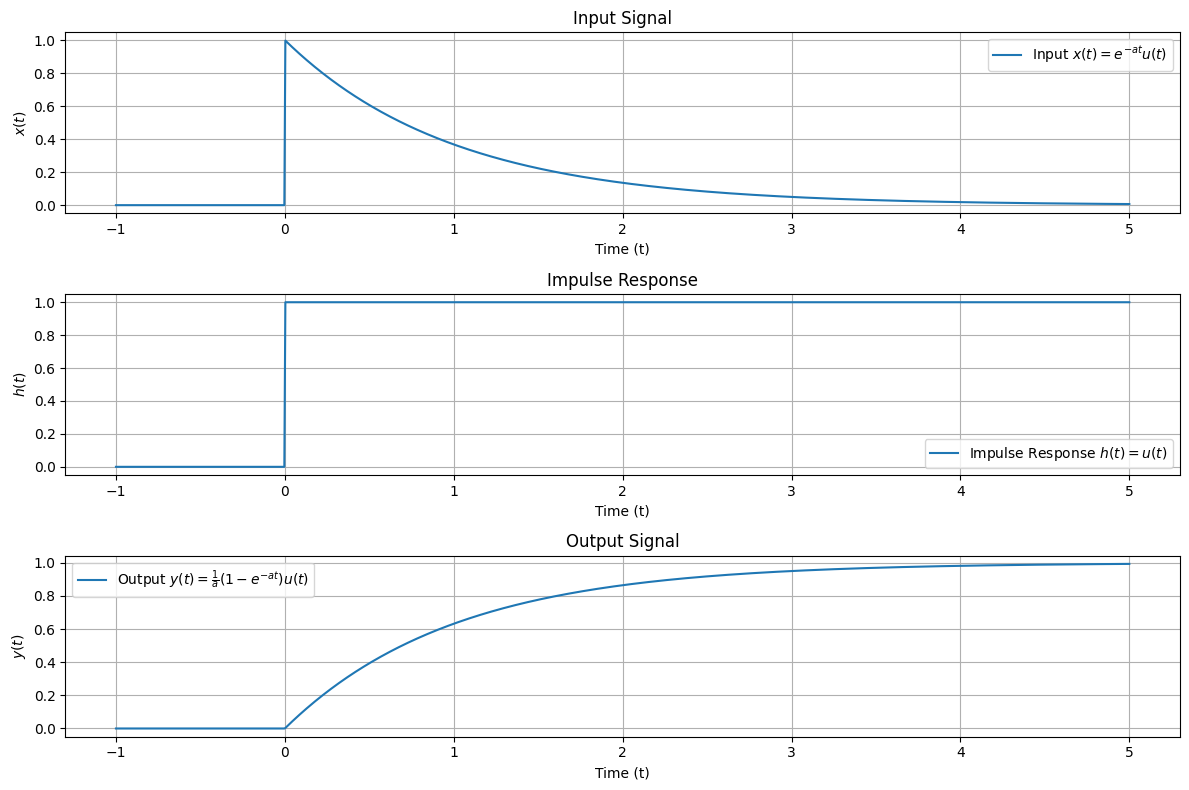

In [39]:
# def main():
#     # Create discrete signals and LTI system
#     discrete_impulse_response = DiscreteSignal([0, 1, 0.5])
#     lti_discrete = LTIDiscrete(discrete_impulse_response)
#     input_signal_discrete = DiscreteSignal([1, 2, 3])

#     # Process the discrete signal
#     output_signal_discrete = lti_discrete.output(input_signal_discrete)
    
#     # Plotting discrete signals
#     input_signal_discrete.plot()
#     output_signal_discrete.plot()

#     # Create continuous signals and LTI system
#     impulse_response_func = lambda t: np.exp(-t) * (t > 0)
#     lti_continuous = LTIContinuous(ContinuousSignal(impulse_response_func))
#     input_signal_func = lambda t: np.sin(t)
#     input_signal_continuous = ContinuousSignal(input_signal_func)

#     # Process the continuous signal
#     output_signal_continuous = lti_continuous.output_approx(input_signal_continuous, 0.1)
    
#     # Plotting continuous signals
#     input_signal_continuous.plot((-10, 10))
#     output_signal_continuous.plot((-10, 10))

# if __name__ == "__main__":
#     main()





import numpy as np
import matplotlib.pyplot as plt

def unit_step(t):
    return np.where(t >= 0, 1, 0)

def input_signal(t, a):
    return np.exp(-a * t) * unit_step(t)

def impulse_response(t):
    return unit_step(t)

def theoretical_output(t, a):
    return (1 - np.exp(-a * t)) / a * unit_step(t)

def main():
    a = 1  # Decay rate for the input signal
    t = np.linspace(-1, 5, 1000)  # Time vector from -1 to 5 seconds
    
    x_t = input_signal(t, a)
    h_t = impulse_response(t)
    y_t = theoretical_output(t, a)
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(3, 1, 1)
    plt.plot(t, x_t, label='Input $x(t) = e^{-at}u(t)$')
    plt.title('Input Signal')
    plt.xlabel('Time (t)')
    plt.ylabel('$x(t)$')
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(t, h_t, label='Impulse Response $h(t) = u(t)$')
    plt.title('Impulse Response')
    plt.xlabel('Time (t)')
    plt.ylabel('$h(t)$')
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(t, y_t, label='Output $y(t) = \\frac{1}{a}(1 - e^{-at})u(t)$')
    plt.title('Output Signal')
    plt.xlabel('Time (t)')
    plt.ylabel('$y(t)$')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()



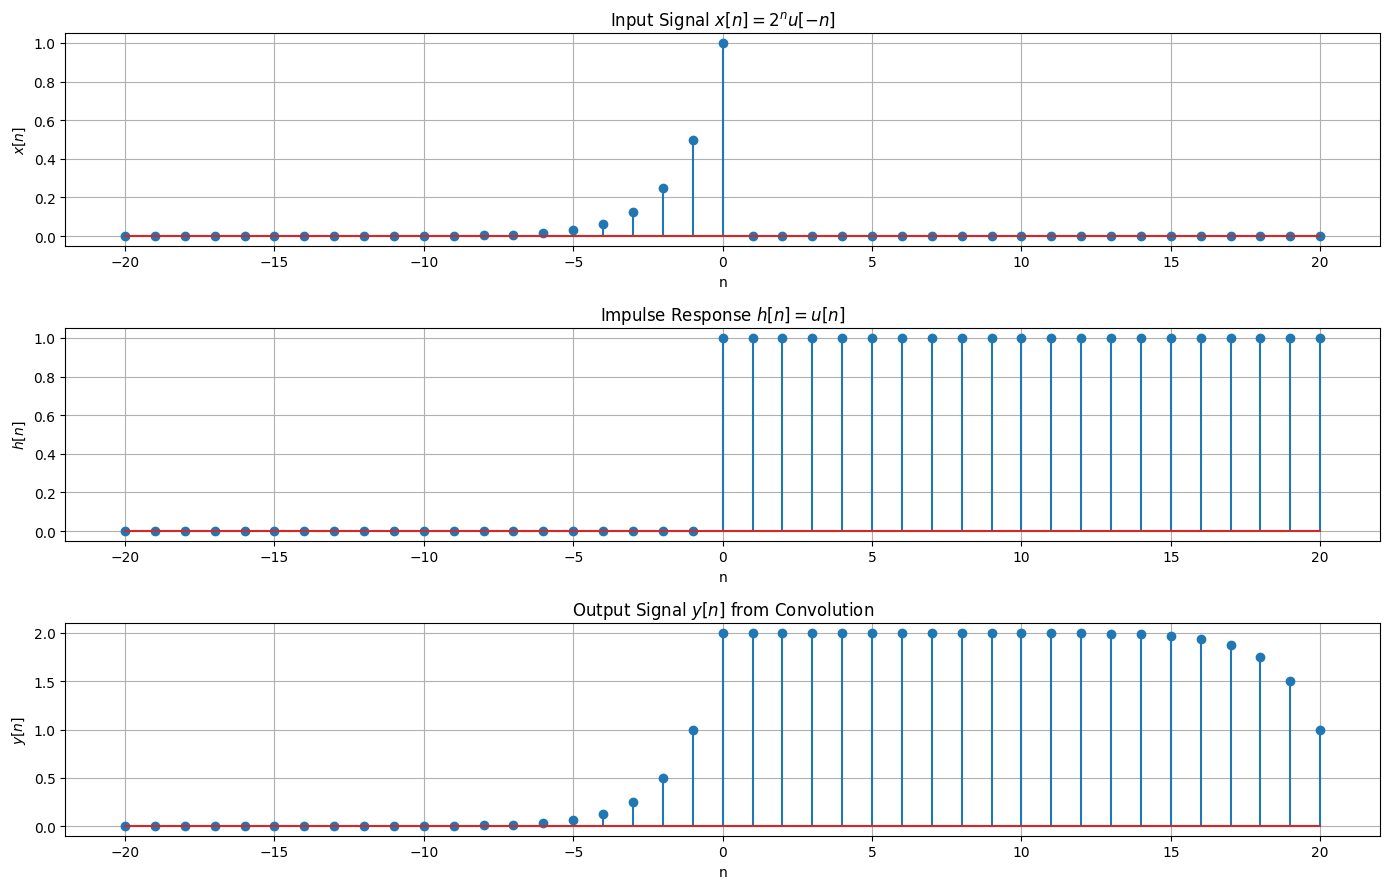

In [8]:
# import numpy as np
# import matplotlib.pyplot as plt

# def input_signal(n):
#     """ Define the input signal x[n] = 2.0^n * u[-n], correctly handling n <= 0 """
#     return 2.0**n if n <= 0 else 0

# def impulse_response(n):
#     """ Define the unit step function h[n] = u[n] """
#     return 1 if n >= 0 else 0

# def main():
#     # Set up for discrete convolution
#     N = 20  # Range of n to plot
#     n = np.arange(-N, N + 1)  # Generate n values from -N to N
#     x = np.array([input_signal(ni) for ni in n])  # Compute x[n] over range
#     h = np.array([impulse_response(ni) for ni in n])  # Compute h[n] over range
    
#     # Compute y[n] via convolution
#     y = np.convolve(x, h, 'full')  # 'full' for no truncation
    
#     # Correcting the index offset introduced by 'full' convolution
#     y_corrected = y[N:3*N+1]  # Correct slicing to match the length of n

#     # Plotting
#     plt.figure(figsize=(10, 5))
#     plt.stem(n, y_corrected)  # Corrected plotting call
#     plt.title('Output Signal $y[n]$ from Convolution')
#     plt.xlabel('n')
#     plt.ylabel('$y[n]$')
#     plt.grid(True)
#     plt.show()

# if __name__ == "__main__":
#     main()


import numpy as np
import matplotlib.pyplot as plt

def input_signal(n):
    """ Define the input signal x[n] = 2.0^n * u[-n], correctly handling n <= 0 """
    return 2.0**n if n <= 0 else 0

def impulse_response(n):
    """ Define the unit step function h[n] = u[n] """
    return 1 if n >= 0 else 0

def main():
    # Set up for discrete convolution
    N = 20  # Range of n to plot
    n = np.arange(-N, N + 1)  # Generate n values from -N to N
    x = np.array([input_signal(ni) for ni in n])  # Compute x[n] over range
    h = np.array([impulse_response(ni) for ni in n])  # Compute h[n] over range
    
    # Compute y[n] via convolution
    y = np.convolve(x, h, 'full')  # 'full' for no truncation
    
    # Correcting the index offset introduced by 'full' convolution
    y_corrected = y[N:3*N+1]  # Correct slicing to match the length of n

    # Plotting
    plt.figure(figsize=(14, 9))

    # Plotting input signal
    plt.subplot(3, 1, 1)
    plt.stem(n, x)
    plt.title('Input Signal $x[n] = 2^n u[-n]$')
    plt.xlabel('n')
    plt.ylabel('$x[n]$')
    plt.grid(True)

    # Plotting impulse response
    plt.subplot(3, 1, 2)
    plt.stem(n, h)
    plt.title('Impulse Response $h[n] = u[n]$')
    plt.xlabel('n')
    plt.ylabel('$h[n]$')
    plt.grid(True)

    # Plotting output signal
    plt.subplot(3, 1, 3)
    plt.stem(n, y_corrected)
    plt.title('Output Signal $y[n]$ from Convolution')
    plt.xlabel('n')
    plt.ylabel('$y[n]$')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the classes and methods for DiscreteSignal, LTIDiscrete, ContinuousSignal, and LTIContinuous if not defined elsewhere in your code.

def main():
    # Ensure the output directories exist
    discrete_dir = 'discrete_plots'
    continuous_dir = 'continuous_plots'
    os.makedirs(discrete_dir, exist_ok=True)
    os.makedirs(continuous_dir, exist_ok=True)
    
    # Discrete Portion
    h_n = [0, 1, 0.5]  # Example impulse response
    x_n = [1, 2, 3, 4, 5]  # Example input signal
    discrete_system = LTIDiscrete(DiscreteSignal(h_n))
    input_signal_d = DiscreteSignal(x_n)

    # Plot impulse response
    plt.figure()
    plt.stem(h_n)  # Removed use_line_collection
    plt.title('Impulse Response')
    plt.savefig(f'{discrete_dir}/impulse_response.png')
    plt.close()

    # Linear combination of impulses
    impulses, coefficients = discrete_system.linear_combination_of_impulses(input_signal_d)
    plot_impulses(impulses, coefficients, 'Discrete Returned Impulses', discrete_dir)

    # Output signal
    output_signal = discrete_system.output(input_signal_d)
    plot_discrete_output(output_signal, 'Discrete Output Signal', discrete_dir)

    # Continuous Portion
    h_t = lambda t: np.exp(-t) * (t >= 0)  # Continuous impulse response
    x_t = lambda t: np.sin(t)  # Continuous input signal
    continuous_system = LTIContinuous(ContinuousSignal(h_t))
    input_signal_c = ContinuousSignal(x_t)

    # Plotting outputs for different deltas
    deltas = [0.5, 0.1, 0.05, 0.01]
    for delta in deltas:
        output_signal = continuous_system.output_approx(input_signal_c, delta)
        plt.figure()
        plt.plot(np.linspace(-3, 3, 400), output_signal.func(np.linspace(-3, 3, 400)), label='Approx Output')
        plt.legend()
        plt.title(f'Continuous Output Signal Delta = {delta}')
        plt.savefig(f'{continuous_dir}/output_signal_delta_{delta}.png')
        plt.close()

def plot_impulses(impulses, coefficients, title, directory):
    fig, axs = plt.subplots(nrows=len(impulses), ncols=1, figsize=(10, 2 * len(impulses)))
    for ax, (impulse, coeff) in zip(axs, zip(impulses, coefficients)):
        ax.stem(impulse.values * coeff)  # Removed use_line_collection
        ax.set_title(f'{title} Coefficient = {coeff}')
    plt.tight_layout()
    plt.savefig(f'{directory}/{title.lower().replace(" ", "_")}.png')
    plt.close()

def plot_discrete_output(signal, title, directory):
    plt.figure()
    plt.stem(signal.values)  # Removed use_line_collection
    plt.title(title)
    plt.savefig(f'{directory}/{title.lower().replace(" ", "_")}.png')
    plt.close()

if __name__ == "__main__":
    main()


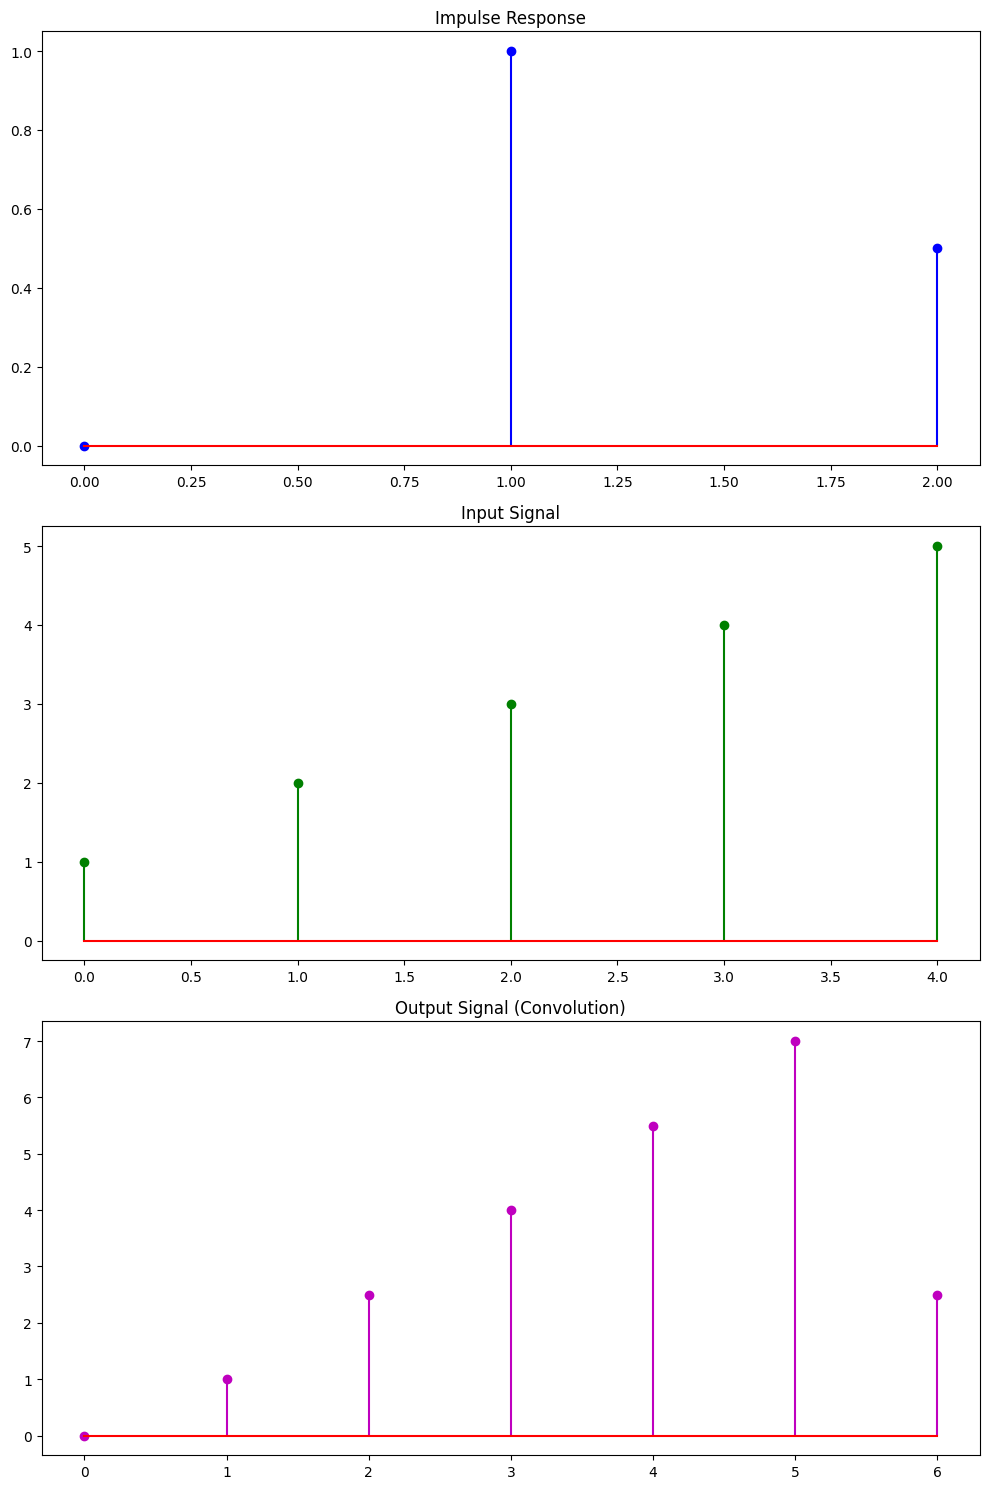

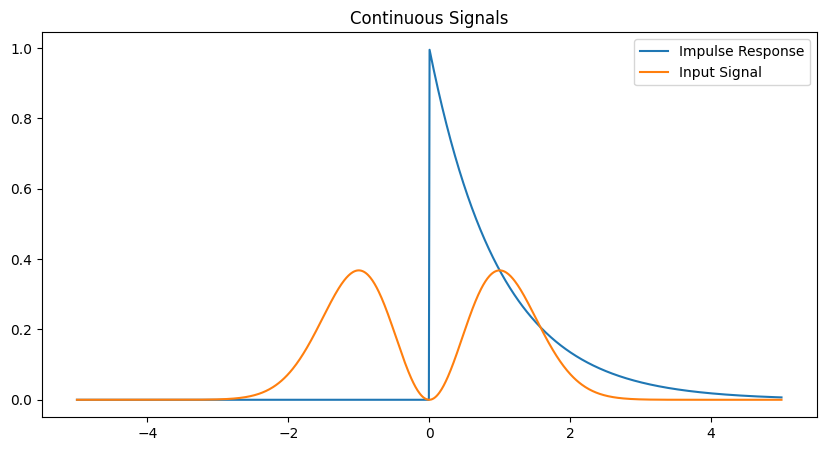

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Example definitions for signal and system classes
class DiscreteSignal:
    def __init__(self, values):
        self.values = np.array(values)

    def plot(self):
        plt.stem(self.values)
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')
        plt.show()

class ContinuousSignal:
    def __init__(self, func, duration=10, step=0.01):
        self.func = func
        self.t = np.arange(-duration, duration, step)

    def plot(self):
        plt.plot(self.t, self.func(self.t))
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.show()

# Generate discrete and continuous signals
discrete_signal = DiscreteSignal([0, 1, 0.5, 0.25])
continuous_signal = ContinuousSignal(lambda t: np.exp(-t**2))

# Example plot functions based on descriptions
def plot_discrete_signals():
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Impulse response
    axs[0].stem([0, 1, 0.5], linefmt='b-', markerfmt='bo', basefmt='r-')
    axs[0].set_title('Impulse Response')

    # Input signal
    axs[1].stem([1, 2, 3, 4, 5], linefmt='g-', markerfmt='go', basefmt='r-')
    axs[1].set_title('Input Signal')

    # Output signal
    axs[2].stem(np.convolve([0, 1, 0.5], [1, 2, 3, 4, 5], 'full'), linefmt='m-', markerfmt='mo', basefmt='r-')
    axs[2].set_title('Output Signal (Convolution)')

    plt.tight_layout()
    plt.show()

def plot_continuous_signals():
    t = np.linspace(-5, 5, 1000)
    impulse_response = lambda t: np.exp(-t) * (t > 0)
    input_signal = lambda t: (t**2) * np.exp(-t**2)

    plt.figure(figsize=(10, 5))
    plt.plot(t, impulse_response(t), label='Impulse Response')
    plt.plot(t, input_signal(t), label='Input Signal')
    plt.legend()
    plt.title('Continuous Signals')
    plt.show()

# Call the plot functions
plot_discrete_signals()
plot_continuous_signals()



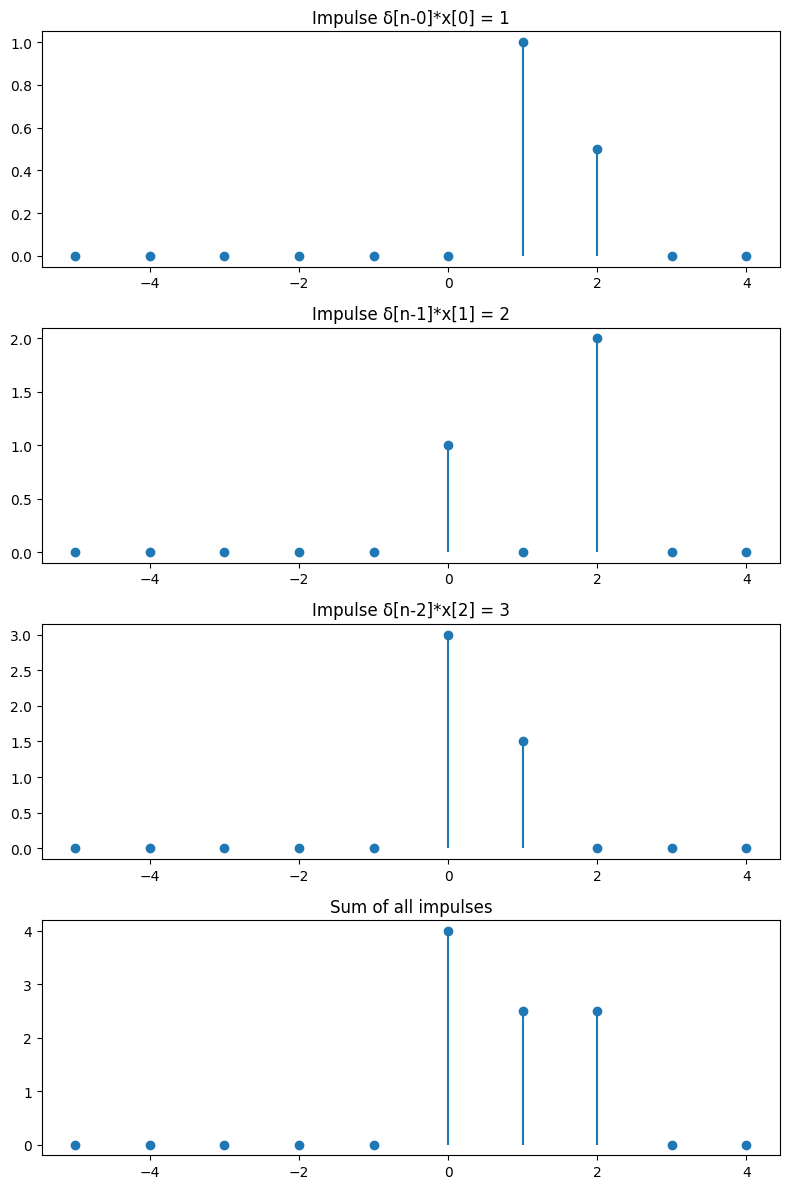

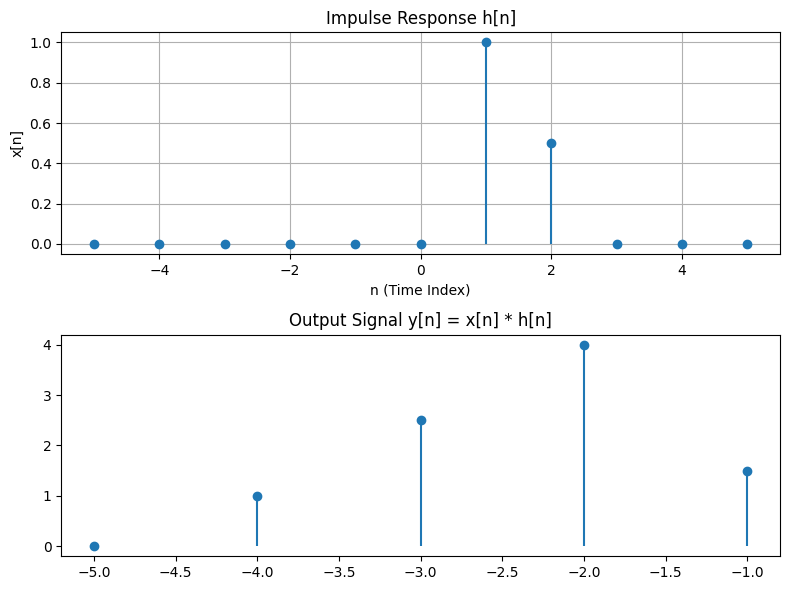

In [6]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Define a class to represent discrete signals
# class DiscreteSignal:
#     def __init__(self, values):
#         self.values = np.array(values)

#     def plot(self, ax, title):
#         n = np.arange(len(self.values))
#         ax.stem(n, self.values, basefmt=" ")
#         ax.set_title(title)
#         ax.set_xlabel('n (Time Index)')
#         ax.set_ylabel('x[n]')
#         ax.grid(True)

# # Define the LTI system for discrete signals
# class LTIDiscrete:
#     def __init__(self, impulse_response):
#         self.impulse_response = impulse_response

#     def linear_combination_of_impulses(self, input_signal):
#         # Convolve the input signal with the impulse response
#         output_signal = np.convolve(input_signal.values, self.impulse_response.values)
#         return DiscreteSignal(output_signal)

# def main():
#     # Define the discrete impulse response and input signals
#     discrete_impulse_response = DiscreteSignal([0, 1, 0.5])
#     input_signal_discrete = DiscreteSignal([1, 2, 3])

#     # Create an LTI discrete system
#     lti_discrete = LTIDiscrete(discrete_impulse_response)

#     # Process the input signal through the LTI system
#     output_signal_discrete = lti_discrete.linear_combination_of_impulses(input_signal_discrete)

#     # Plotting the input and output signals
#     fig, axs = plt.subplots(2, 1, figsize=(8, 6))

#     # Plot the input signal
#     input_signal_discrete.plot(axs[0], 'Input Signal')

#     # Plot the output signal (convolution result)
#     output_signal_discrete.plot(axs[1], 'Output Signal (Convolution Result)')

#     plt.tight_layout()
#     plt.show()

# if __name__ == "__main__":
#     main()


import numpy as np
import matplotlib.pyplot as plt

# Define a class to represent discrete signals
class DiscreteSignal:
    def __init__(self, values):
        self.values = np.array(values)

    def plot(self, ax, title, n_range):
        n = np.arange(n_range[0], n_range[1] + 1)
        values = np.pad(self.values, (abs(n_range[0]), n_range[1] - len(self.values) + 1), 'constant')
        ax.stem(n, values, basefmt=" ")
        ax.set_title(title)
        ax.set_xlabel('n (Time Index)')
        ax.set_ylabel('x[n]')
        ax.grid(True)

# Define the LTI system for discrete signals
class LTIDiscrete:
    def __init__(self, impulse_response):
        self.impulse_response = impulse_response

    # Method for linear combination of impulses (figure 1 and 2)
    def linear_combination_of_impulses(self, input_signal):
        impulses = []
        coefficients = input_signal.values
        for i in range(len(coefficients)):
            shifted_impulse = np.roll(self.impulse_response.values, i)
            impulses.append(shifted_impulse * coefficients[i])
        return impulses, coefficients

    # Method for computing the output (figure 3 and 4)
    def output(self, input_signal):
        return np.convolve(input_signal.values, self.impulse_response.values, mode='full')

def main():
    # Define the discrete impulse response and input signals
    impulse_response = DiscreteSignal([0, 1, 0.5])  # Arbitrary impulse response h[n]
    input_signal = DiscreteSignal([1, 2, 3])  # Arbitrary input signal x[n]

    # Create an LTI discrete system
    lti_discrete = LTIDiscrete(impulse_response)

    # Linear combination of impulses (for figure 1 and 2)
    impulses, coefficients = lti_discrete.linear_combination_of_impulses(input_signal)

    # Dynamically calculate the x-axis range for padding
    max_len = len(impulses[0]) + len(coefficients) - 1
    time_range = np.arange(-5, max_len - 5 + 5)  # Adjusted time range for proper lengths

    # Plot each impulse multiplied by its coefficient and their sum
    fig1, axs1 = plt.subplots(len(impulses) + 1, 1, figsize=(8, 12))
    
    for i, impulse in enumerate(impulses):
        padded_impulse = np.pad(impulse, (5, max(0, len(time_range) - len(impulse) - 5)), 'constant')
        axs1[i].stem(time_range[:len(padded_impulse)], padded_impulse, basefmt=" ")
        axs1[i].set_title(f'Impulse δ[n-{i}]*x[{i}] = {coefficients[i]}')

    # Plot the sum of all impulses
    sum_of_impulses = np.sum(impulses, axis=0)
    padded_sum_of_impulses = np.pad(sum_of_impulses, (5, max(0, len(time_range) - len(sum_of_impulses) - 5)), 'constant')
    axs1[-1].stem(time_range[:len(padded_sum_of_impulses)], padded_sum_of_impulses, basefmt=" ")
    axs1[-1].set_title('Sum of all impulses')
    
    plt.tight_layout()
    plt.show()

    # Output (for figure 3 and 4)
    output_signal = lti_discrete.output(input_signal)

    fig2, axs2 = plt.subplots(2, 1, figsize=(8, 6))

    # Plot the impulse response h[n] with time range [-5, 5]
    impulse_response.plot(axs2[0], 'Impulse Response h[n]', (-5, 5))

    # Plot the output signal
    n_output = np.arange(-5, -5 + len(output_signal))  # Adjust x-axis for output signal length
    axs2[1].stem(n_output, output_signal, basefmt=" ")
    axs2[1].set_title('Output Signal y[n] = x[n] * h[n]')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


<>:78: SyntaxWarning: invalid escape sequence '\d'
<>:78: SyntaxWarning: invalid escape sequence '\d'
/var/folders/zh/0p6yf5hj3kz0f5_st2ym0wr80000gn/T/ipykernel_36568/1234881312.py:78: SyntaxWarning: invalid escape sequence '\d'
  axes[i].set_title(f'$\delta[n - {i-5}]x[{coeff}]$')


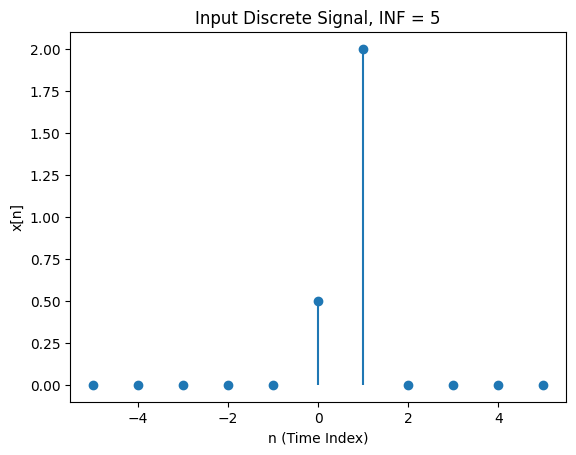

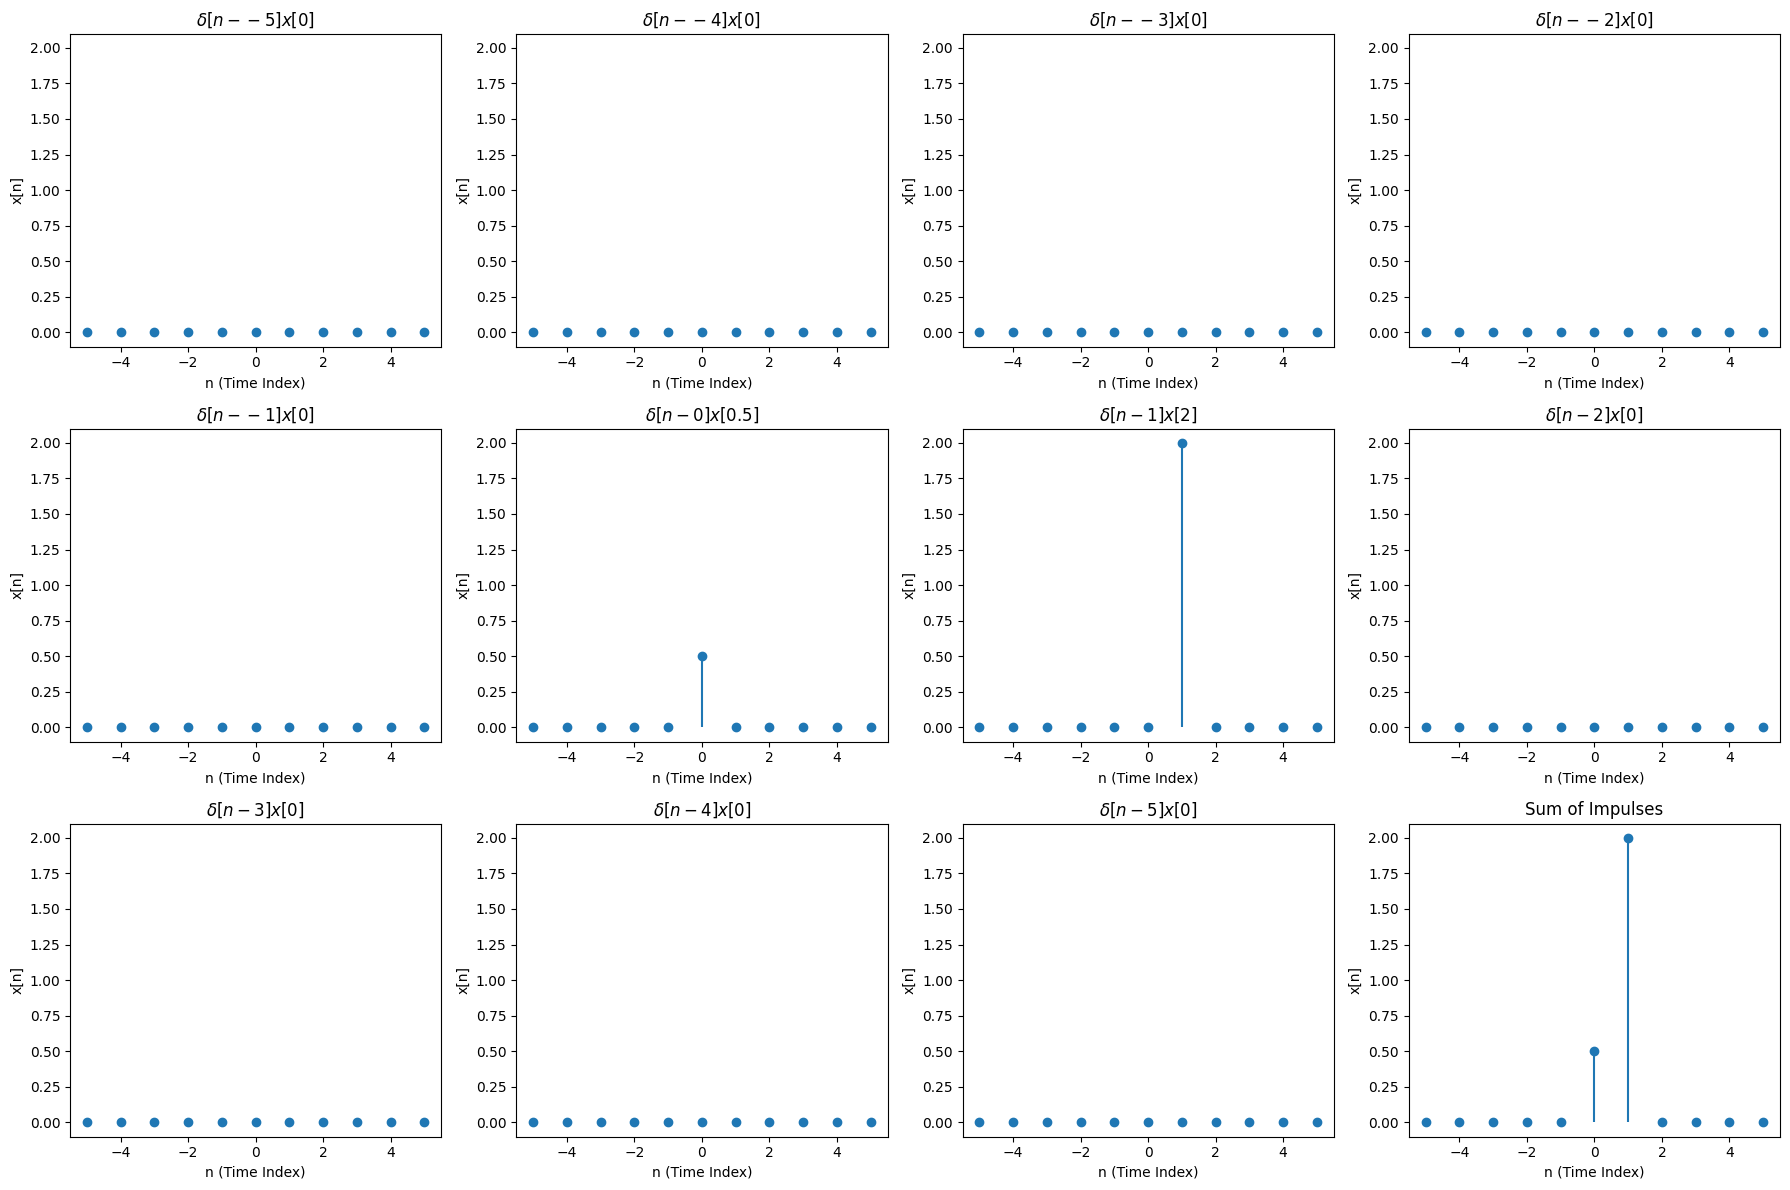

/var/folders/zh/0p6yf5hj3kz0f5_st2ym0wr80000gn/T/ipykernel_36568/1234881312.py:78: SyntaxWarning: invalid escape sequence '\d'
  axes[i].set_title(f'$\delta[n - {i-5}]x[{coeff}]$')


TypeError: DiscreteSignal.plot() got an unexpected keyword argument 'filename'

In [16]:
# import numpy as np
# import matplotlib.pyplot as plt

# class DiscreteSignal:
#     def __init__(self, values):
#         self.values = np.array(values)
    
#     def plot(self, title, ax):
#         ax.stem(range(-5, len(self.values) - 5), self.values, basefmt=" ")
#         ax.set_title(title)
#         ax.set_xlabel('n (Time Index)')
#         ax.set_ylabel('x[n]')

# def plot_impulses_with_coefficients(signal, coefficients, fig, row, col, total_rows, total_cols):
#     for i, coeff in enumerate(coefficients):
#         ax = fig.add_subplot(total_rows, total_cols, col + i + 1)
#         impulse = np.zeros_like(signal)
#         impulse[i] = coeff
#         ax.stem(range(-5, len(signal) - 5), impulse, basefmt=" ", linefmt='C0-', markerfmt='C0o')
#         ax.set_title(f'$\delta[n - {i-5}]x[{coeff}]$')
#         ax.set_xlabel('n (Time Index)')
#         ax.set_ylabel('x[n]')
#         ax.set_ylim([-0.1, 2.1])

# def main():
#     # Create an input discrete signal
#     input_signal = DiscreteSignal([0, 0, 0, 0, 0, 0.5, 2, 0, 0, 0, 0])

#     # Coefficients for plotting (only two nonzero values)
#     coefficients = [0] * 11
#     coefficients[5] = 0.5  # delta[n-0]*x[0]
#     coefficients[6] = 2    # delta[n-1]*x[1]
    
#     # Create a figure to plot the signals
#     fig = plt.figure(figsize=(18, 12))

#     # Plot input signal
#     ax1 = fig.add_subplot(3, 4, 1)
#     input_signal.plot('Input Discrete Signal, INF = 5', ax1)
    
#     # Plot impulses multiplied by coefficients
#     plot_impulses_with_coefficients(input_signal.values, coefficients, fig, 1, 1, 3, 4)

#     # Save plots to disk
#     plt.tight_layout()
#     plt.savefig('discrete_signals.png')
#     plt.show()

# if __name__ == '__main__':
#     main()

import numpy as np
import matplotlib.pyplot as plt

class DiscreteSignal:
    def __init__(self, values):
        self.values = np.array(values)
    
    def plot(self, title, ax=None, show=True):
        if ax is None:
            fig, ax = plt.subplots()
        ax.stem(range(-5, len(self.values) - 5), self.values, basefmt=" ")
        ax.set_title(title)
        ax.set_xlabel('n (Time Index)')
        ax.set_ylabel('x[n]')
        if show:
            plt.show()

def plot_impulses_with_coefficients(signal, coefficients):
    fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # Adjust grid size as needed
    axes = axes.flatten()
    combined_signal = np.zeros_like(signal)
    for i, coeff in enumerate(coefficients):
        impulse = np.zeros_like(signal)
        impulse[i] = coeff
        combined_signal += impulse
        axes[i].stem(range(-5, len(signal) - 5), impulse, basefmt=" ", linefmt='C0-', markerfmt='C0o')
        axes[i].set_title(f'$\delta[n - {i-5}]x[{coeff}]$')
        axes[i].set_xlabel('n (Time Index)')
        axes[i].set_ylabel('x[n]')
        axes[i].set_ylim([-0.1, 2.1])
    # Plot the sum of all impulses
    axes[-1].stem(range(-5, len(signal) - 5), combined_signal, basefmt=" ", linefmt='C0-', markerfmt='C0o')
    axes[-1].set_title('Sum of Impulses')
    axes[-1].set_xlabel('n (Time Index)')
    axes[-1].set_ylabel('x[n]')
    axes[-1].set_ylim([-0.1, 2.1])

    # Adjust layout and save
    plt.tight_layout()
    plt.savefig('impulses_multiplied_by_coefficients.png')
    plt.show()
    
    



def main():
    # Create an input discrete signal
    input_signal = DiscreteSignal([0, 0, 0, 0, 0, 0.5, 2, 0, 0, 0, 0])

    # Plot input signal as a separate figure
    input_signal.plot('Input Discrete Signal, INF = 5', show=False)
    plt.savefig('input_signal.png')

    # Coefficients for plotting (only two nonzero values)
    coefficients = [0] * 11
    coefficients[5] = 0.5  # delta[n-0]*x[0]
    coefficients[6] = 2    # delta[n-1]*x[1]

    # Plot impulses multiplied by coefficients as another separate image
    plot_impulses_with_coefficients(input_signal.values, coefficients)

if __name__ == '__main__':
    main()


<>:30: SyntaxWarning: invalid escape sequence '\d'
<>:30: SyntaxWarning: invalid escape sequence '\d'
/var/folders/zh/0p6yf5hj3kz0f5_st2ym0wr80000gn/T/ipykernel_36568/1718827595.py:30: SyntaxWarning: invalid escape sequence '\d'
  axes[i].set_title(f'$\delta[n - {i-5}]x[{coeff}]$')


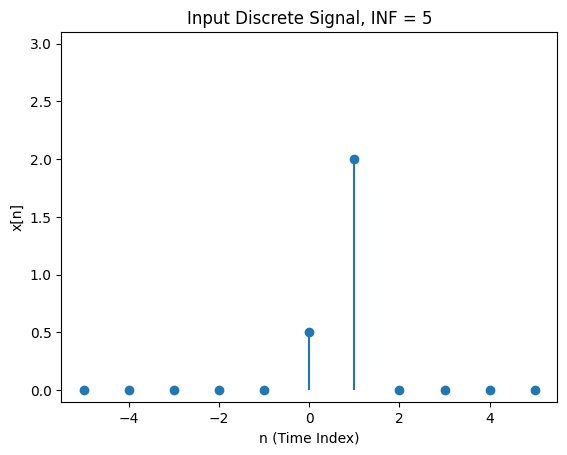

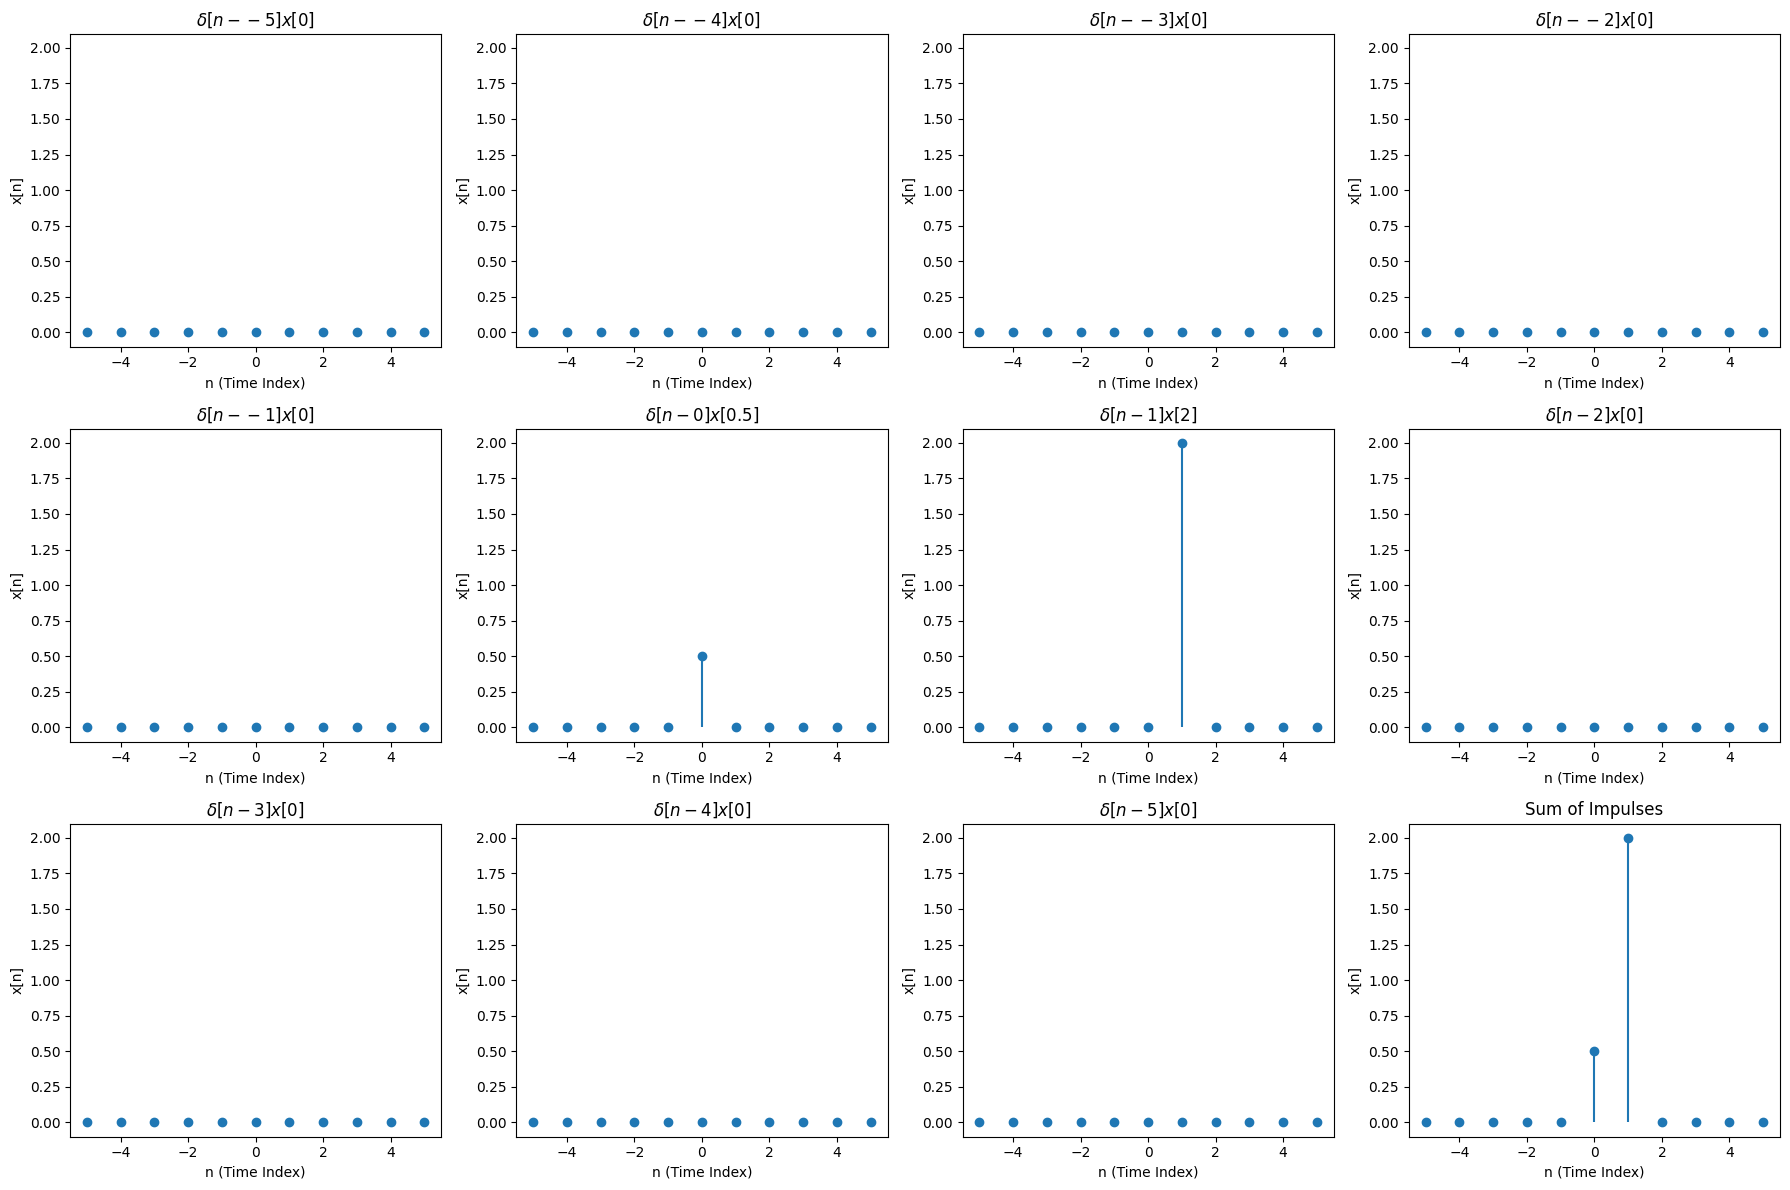

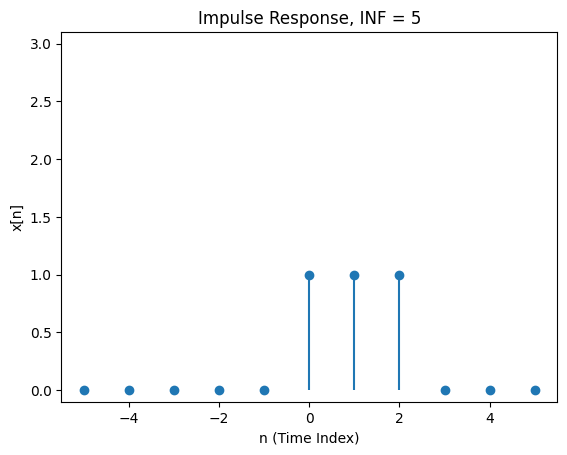

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class DiscreteSignal:
    def __init__(self, values):
        self.values = np.array(values)
    
    def plot(self, title, ax=None, filename=None, show=True):
        if ax is None:
            fig, ax = plt.subplots()
        ax.stem(range(-5, len(self.values) - 5), self.values, basefmt=" ")
        ax.set_title(title)
        ax.set_xlabel('n (Time Index)')
        ax.set_ylabel('x[n]')
        ax.set_ylim([-0.1, 3.1])  # Adjust y-axis limits to match the scale of examples
        if filename:
            plt.savefig(filename)
        if show:
            plt.show()

def plot_impulses_with_coefficients(signal, coefficients):
    fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # Adjust grid size as needed
    axes = axes.flatten()
    combined_signal = np.zeros_like(signal)
    for i, coeff in enumerate(coefficients):
        impulse = np.zeros_like(signal)
        impulse[i] = coeff
        combined_signal += impulse
        axes[i].stem(range(-5, len(signal) - 5), impulse, basefmt=" ", linefmt='C0-', markerfmt='C0o')
        axes[i].set_title(f'$\delta[n - {i-5}]x[{coeff}]$')
        axes[i].set_xlabel('n (Time Index)')
        axes[i].set_ylabel('x[n]')
        axes[i].set_ylim([-0.1, 2.1])
    # Plot the sum of all impulses
    axes[-1].stem(range(-5, len(signal) - 5), combined_signal, basefmt=" ", linefmt='C0-', markerfmt='C0o')
    axes[-1].set_title('Sum of Impulses')
    axes[-1].set_xlabel('n (Time Index)')
    axes[-1].set_ylabel('x[n]')
    axes[-1].set_ylim([-0.1, 2.1])
    plt.tight_layout()
    plt.savefig('impulses_multiplied_by_coefficients.png')
    plt.show()

def plot_impulse_response():
    # Creating an impulse response with specific non-zero values
    impulse_values = np.zeros(11)  # assuming index range from -5 to 5
    impulse_values[5] = 1  # h[0]
    impulse_values[6] = 1  # h[1]
    impulse_values[7] = 1  # h[2]
    
    # Create an instance of DiscreteSignal for the impulse response
    impulse_response = DiscreteSignal(impulse_values)

    # Plot the impulse response as a separate figure
    impulse_response.plot('Impulse Response, INF = 5', filename='impulse_response.png', show=False)

def main():
    # Create an input discrete signal
    input_signal = DiscreteSignal([0, 0, 0, 0, 0, 0.5, 2, 0, 0, 0, 0])

    # Plot input signal as a separate figure
    input_signal.plot('Input Discrete Signal, INF = 5', filename='input_signal.png', show=False)

    # Coefficients for plotting (only two nonzero values)
    coefficients = [0] * 11
    coefficients[5] = 0.5  # delta[n-0]*x[0]
    coefficients[6] = 2    # delta[n-1]*x[1]

    # Plot impulses multiplied by coefficients as another separate image
    plot_impulses_with_coefficients(input_signal.values, coefficients)

    # Plot the impulse response as a new, complete image
    plot_impulse_response()

if __name__ == '__main__':
    main()


<>:32: SyntaxWarning: invalid escape sequence '\d'
<>:32: SyntaxWarning: invalid escape sequence '\d'
/var/folders/zh/0p6yf5hj3kz0f5_st2ym0wr80000gn/T/ipykernel_36568/2565353562.py:32: SyntaxWarning: invalid escape sequence '\d'
  axes[i].set_title(f'$\delta[n - {i-5}]x[{coeff}]$')


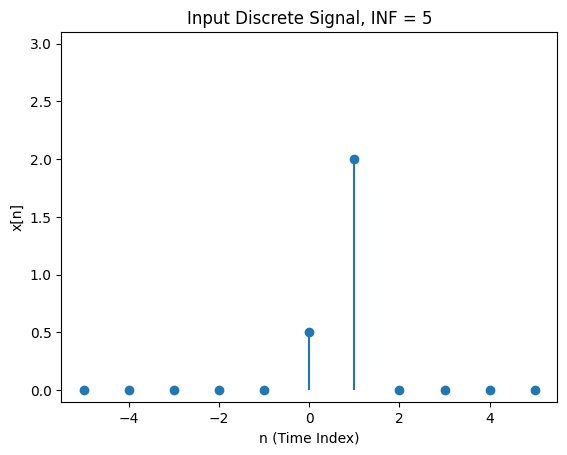

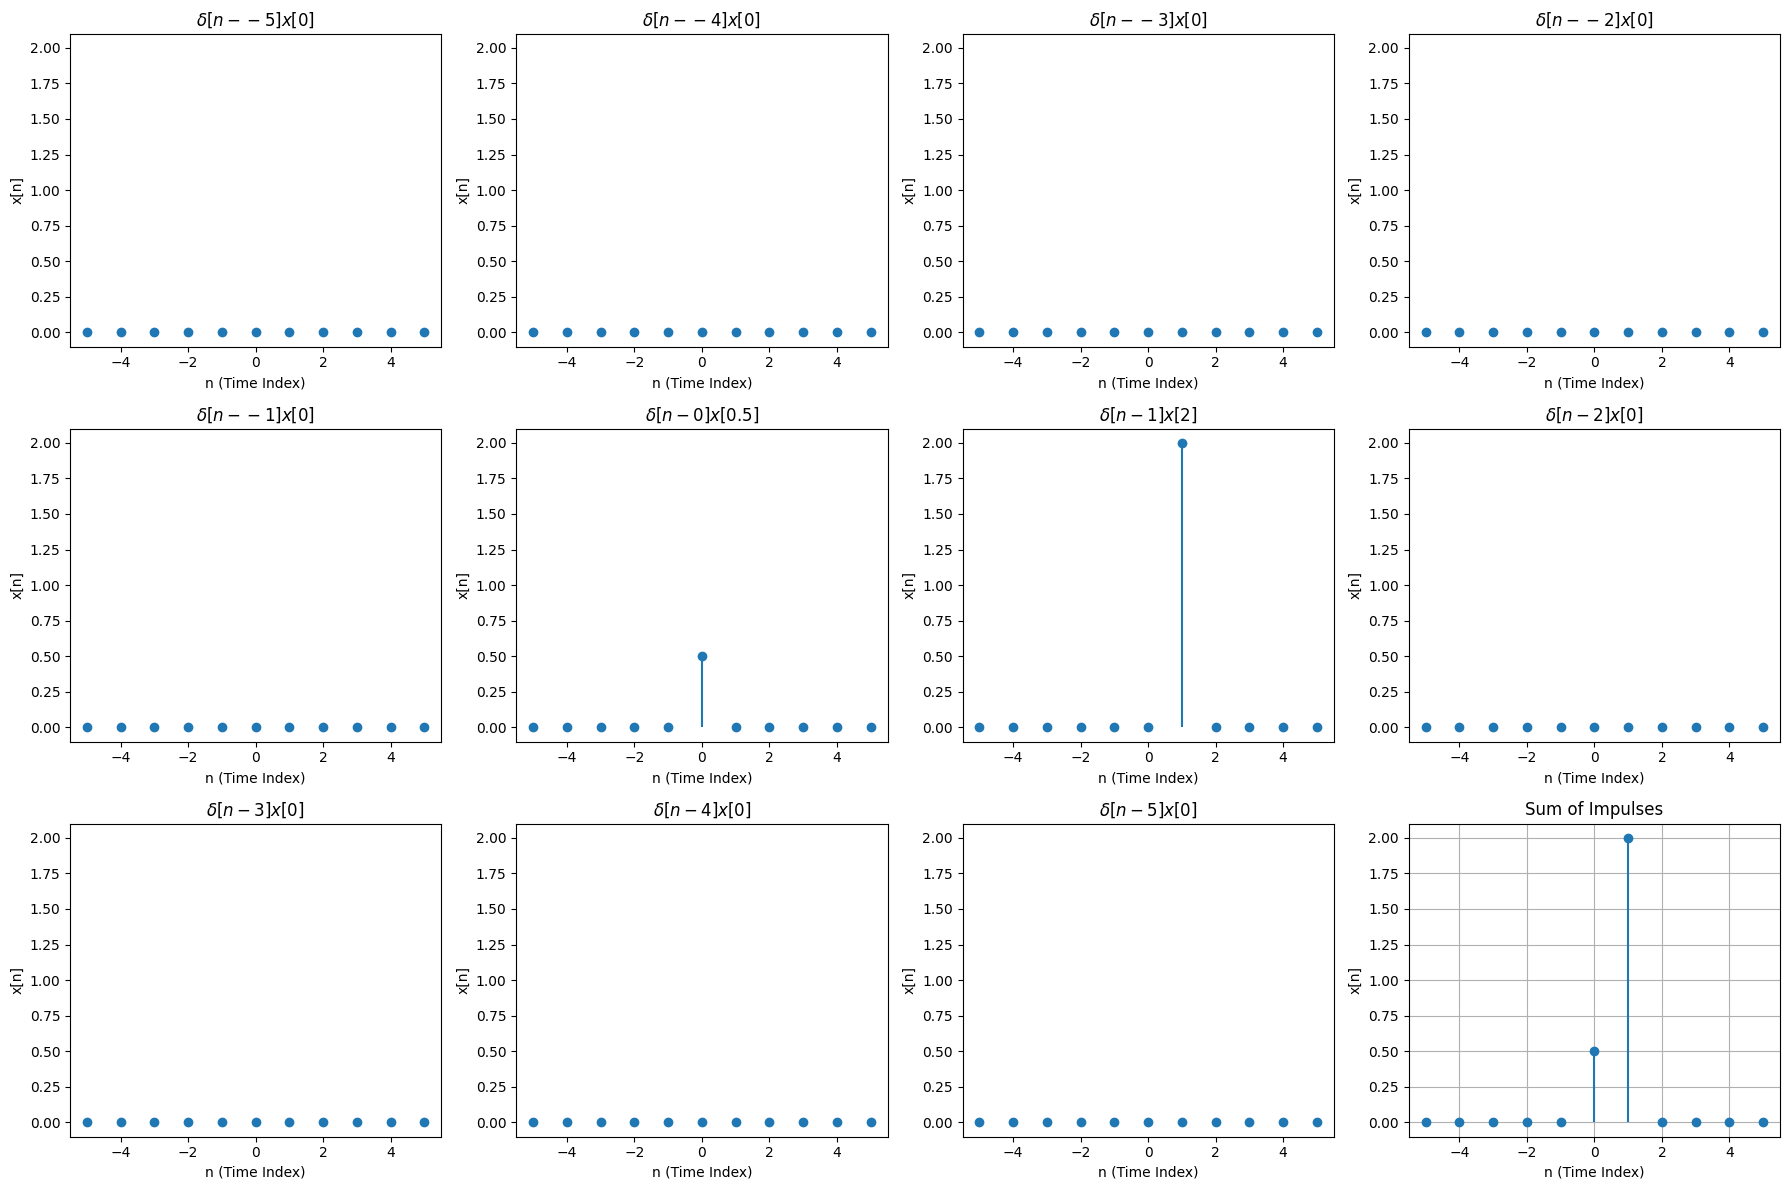

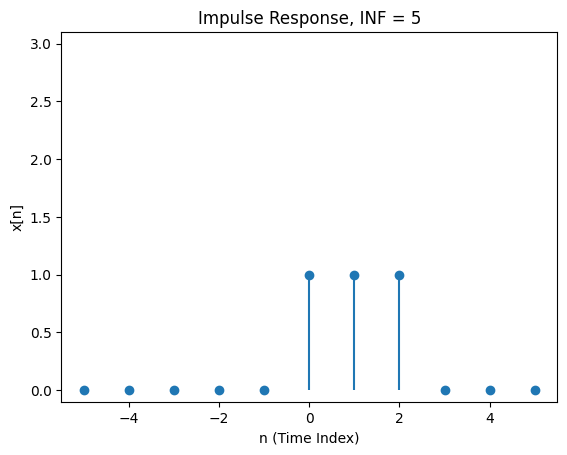

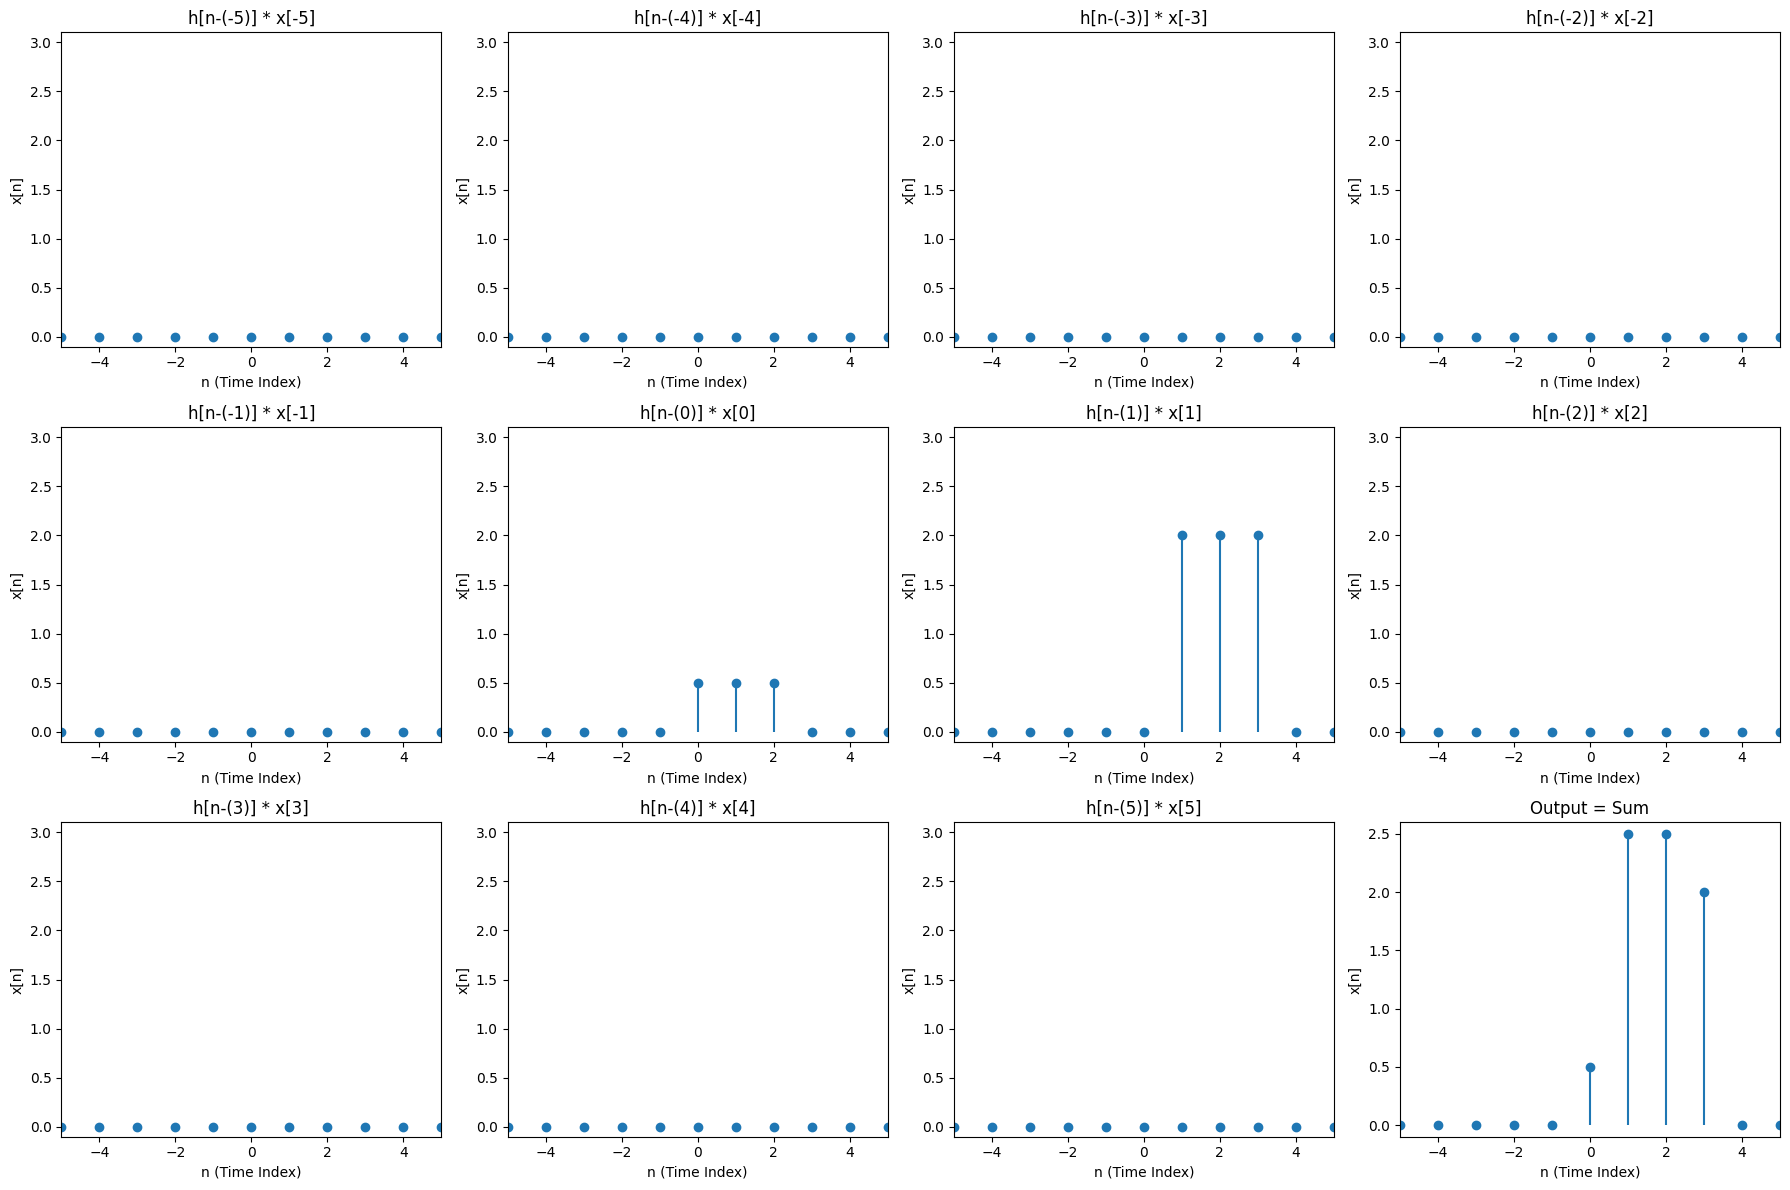

In [35]:
import numpy as np
import matplotlib.pyplot as plt
#Here INF==5
INF=5
class DiscreteSignal:
    def __init__(self, values):
        self.values = np.array(values)
    
    def plot(self, title, ax=None, filename=None, show=True):
        if ax is None:
            fig, ax = plt.subplots()
        ax.stem(range(-5, len(self.values) - 5), self.values, basefmt=" ")
        ax.set_title(title)
        ax.set_xlabel('n (Time Index)')
        ax.set_ylabel('x[n]')
        ax.set_ylim([-0.1, 3.1])  # Adjust y-axis limits to match the scale of examples
        if filename:
            plt.savefig(filename)
        if show:
            plt.grid(True)
            plt.show()

def plot_impulses_with_coefficients(signal, coefficients):
    fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # Grid size adjusted for 12 subplots
    axes = axes.flatten()
    combined_signal = np.zeros_like(signal)
    for i, coeff in enumerate(coefficients):
        impulse = np.zeros_like(signal)
        impulse[i] = coeff
        combined_signal += impulse
        axes[i].stem(range(-5, len(signal) - 5), impulse, basefmt=" ", linefmt='C0-', markerfmt='C0o')
        axes[i].set_title(f'$\delta[n - {i-5}]x[{coeff}]$')
        axes[i].set_xlabel('n (Time Index)')
        axes[i].set_ylabel('x[n]')
        axes[i].set_ylim([-0.1, 2.1])
    # Plot the sum of all impulses
    axes[-1].stem(range(-5, len(signal) - 5), combined_signal, basefmt=" ", linefmt='C0-', markerfmt='C0o')
    axes[-1].set_title('Sum of Impulses')
    axes[-1].set_xlabel('n (Time Index)')
    axes[-1].set_ylabel('x[n]')
    axes[-1].set_ylim([-0.1, 2.1])
    plt.tight_layout()
    plt.savefig('impulses_multiplied_by_coefficients.png')
    plt.grid(True)
    plt.show()




def plot_impulse_response():
    # Creating an impulse response with specific non-zero values
    impulse_values = np.zeros(11)  # assuming index range from -5 to 5
    impulse_values[5] = 1  # h[0]
    impulse_values[6] = 1  # h[1]
    impulse_values[7] = 1  # h[2]
    
    # Create an instance of DiscreteSignal for the impulse response
    impulse_response = DiscreteSignal(impulse_values)

    # Plot the impulse response as a separate figure
    impulse_response.plot('Impulse Response, INF = 5', filename='impulse_response.png', show=False)



# def plot_response_of_input_signal(input_signal, impulse_response):
#     fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # Grid size adjusted for 12 subplots
#     axes = axes.flatten()

#     # Create shifted and scaled versions of the impulse response
#     for i in range(-5, 6):  # Covering shifts from -5 to 5
#         shifted_impulse = np.roll(impulse_response.values, i)
#         scaled_impulse = shifted_impulse * (input_signal.values[i+5] if (i+5) >= 0 and (i+5) < len(input_signal.values) else 0)
#         axes[i+5].stem(range(len(scaled_impulse)), scaled_impulse, basefmt=" ")
#         axes[i+5].set_title(f'h[n-({i})] * x[{i}]')
#         axes[i+5].set_xlabel('n (Time Index)')
#         axes[i+5].set_ylabel('x[n]')
#         axes[i+5].set_ylim([-0.1, 3.1])

#     # Calculate the overall output by summing all scaled impulses
#     output_signal = np.zeros_like(input_signal.values)
#     for i in range(-5, 6):
#         shifted_impulse = np.roll(impulse_response.values, i)
#         output_signal += shifted_impulse * (input_signal.values[i+5] if (i+5) >= 0 and (i+5) < len(input_signal.values) else 0)

#     # Plot the output signal
#     axes[-1].stem(range(len(output_signal)), output_signal, basefmt=" ")
#     axes[-1].set_title('Output = Sum')
#     axes[-1].set_xlabel('n (Time Index)')
#     axes[-1].set_ylabel('x[n]')
#     axes[-1].set_ylim([-0.1, 3.1])

#     plt.tight_layout()
#     plt.savefig('output_signal.png')
#     plt.grid(True)
#     plt.show()


def plot_response_of_input_signal(input_signal, impulse_response):
    fig, axes = plt.subplots(3, 4, figsize=(18, 12))
    axes = axes.flatten()
    for i in range(-5, 6):
        shifted_impulse = np.roll(impulse_response.values, i + 5)  # shift by i + 5 to center the impulses around zero index
        scaled_impulse = shifted_impulse * (input_signal.values[i+5] if (i+5) >= 0 and (i+5) < len(input_signal.values) else 0)
        indices = range(-5, len(scaled_impulse) - 5)
        axes[i+5].stem(indices, scaled_impulse, basefmt=" ")
        axes[i+5].set_title(f'h[n-({i})] * x[{i}]')
        axes[i+5].set_xlabel('n (Time Index)')
        axes[i+5].set_ylabel('x[n]')
        axes[i+5].set_ylim([-0.1, 3.1])
        axes[i+5].set_xlim([-5, 5])

    # Sum all scaled impulses for the output
    output_signal = np.sum([np.roll(impulse_response.values * input_signal.values[i+5], i + 5) 
                            for i in range(-5, 6) if (i+5) < len(input_signal.values)], axis=0)
    axes[-1].stem(indices, output_signal, basefmt=" ")
    axes[-1].set_title('Output = Sum')
    axes[-1].set_xlabel('n (Time Index)')
    axes[-1].set_ylabel('x[n]')
    axes[-1].set_ylim([-0.1, max(output_signal) + 0.1])
    axes[-1].set_xlim([-5, 5])

    plt.tight_layout()
    plt.savefig('output_signal.png')
    plt.show()

def main():
    # Impulse response and input signal
    impulse_response = DiscreteSignal([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])
    input_signal = DiscreteSignal([0, 0, 0, 0, 0, 0.5, 2, 0, 0, 0, 0])

    # Plot input signal as a separate figure
    input_signal.plot('Input Discrete Signal, INF = 5', filename='input_signal.png', show=False)

    # Coefficients for plotting (only two nonzero values)
    coefficients = [0] * 11
    coefficients[5] = 0.5  # delta[n-0]*x[0]
    coefficients[6] = 2    # delta[n-1]*x[1]

    # Plot impulses multiplied by coefficients as another separate image
    plot_impulses_with_coefficients(input_signal.values, coefficients)
    
    
    plot_impulse_response()

    # Plot the response of the input signal to the impulse response
    plot_response_of_input_signal(input_signal, impulse_response)

if __name__ == '__main__':
    main()


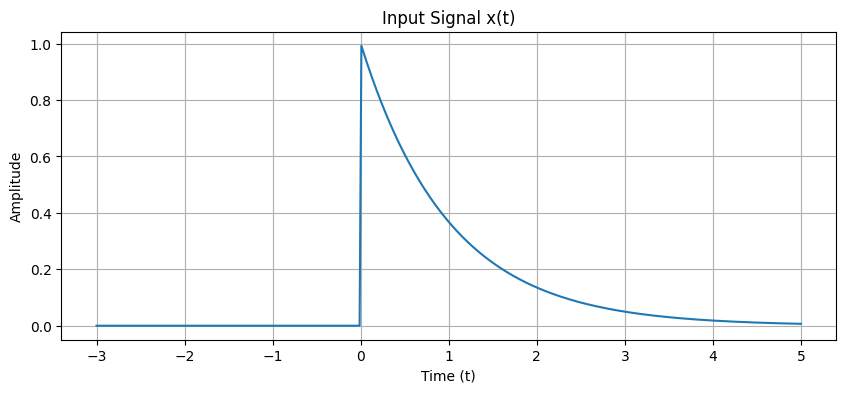

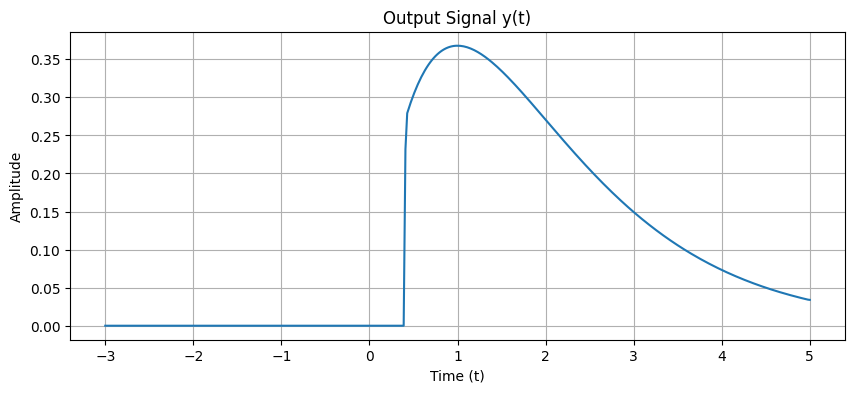

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

class ContinuousSignal:
    def __init__(self, function):
        self.function = function

    def shift(self, tau):
        return ContinuousSignal(lambda t: self.function(t - tau))

    def scale(self, factor):
        return ContinuousSignal(lambda t: factor * self.function(t))

    def add(self, other):
        return ContinuousSignal(lambda t: self.function(t) + other.function(t))

    def multiply(self, other):
        return ContinuousSignal(lambda t: self.function(t) * other.function(t))

    def plot(self, t_range, title="Signal", num_points=400):
        t = np.linspace(t_range[0], t_range[1], num_points)
        y = np.vectorize(self.function)(t)
        plt.figure(figsize=(10, 4))
        plt.plot(t, y, label=title)
        plt.title(title)
        plt.xlabel('Time (t)')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()

class LTIContinuousSystem:
    def __init__(self, impulse_response):
        self.impulse_response = impulse_response

    def output(self, input_signal, t_range, dt=0.01):
        def integrand(tau, t):
            return input_signal.function(tau) * self.impulse_response.function(t - tau)
        
        t_values = np.arange(t_range[0], t_range[1], dt)
        output_values = []
        for t in t_values:
            result, _ = quad(integrand, t_range[0], t_range[1], args=(t,))
            output_values.append(result)
        
        output_signal = ContinuousSignal(lambda t: np.interp(t, t_values, output_values))
        return output_signal

def main():
    # Define the input signal (exponential decay multiplied by Heaviside step function to emulate causality)
    input_signal = ContinuousSignal(lambda t: np.exp(-t) * (t > 0))

    # Define the impulse response as an ideal impulse (not realistic, used here for illustrative purposes)
    impulse_response = ContinuousSignal(lambda t: np.exp(-t) * (t > 0))

    # Create an LTI system with the defined impulse response
    system = LTIContinuousSystem(impulse_response)

    # Plot the input signal
    input_signal.plot(t_range=(-3, 5), title="Input Signal x(t)")

    # Compute the system's output
    output_signal = system.output(input_signal, t_range=(-3, 5))

    # Plot the output signal
    output_signal.plot(t_range=(-3, 5), title="Output Signal y(t)")

if __name__ == "__main__":
    main()


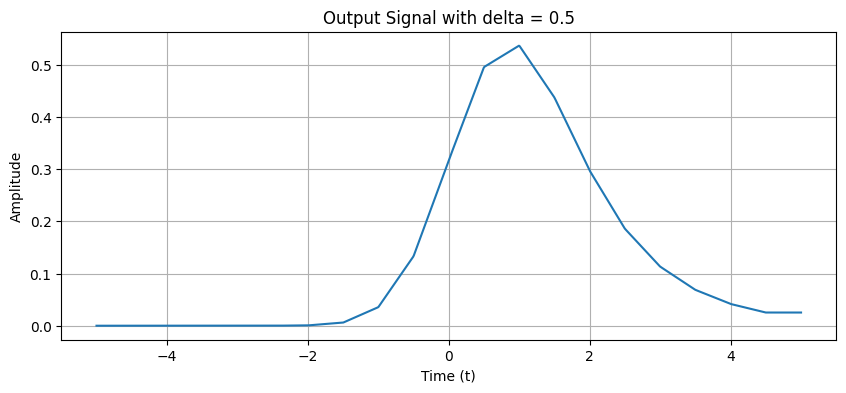

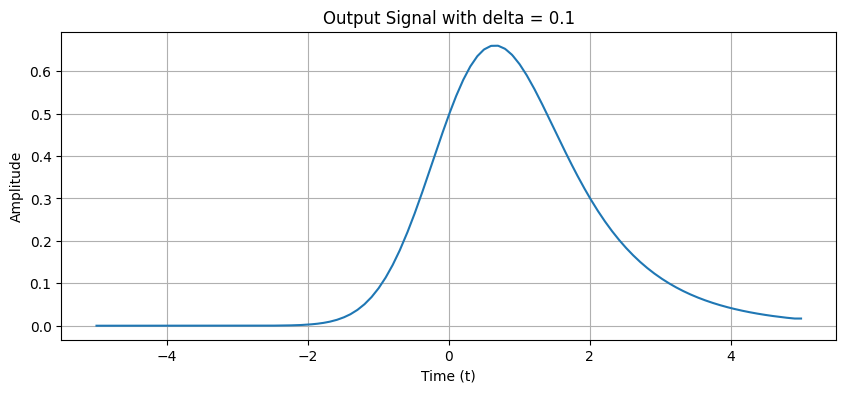

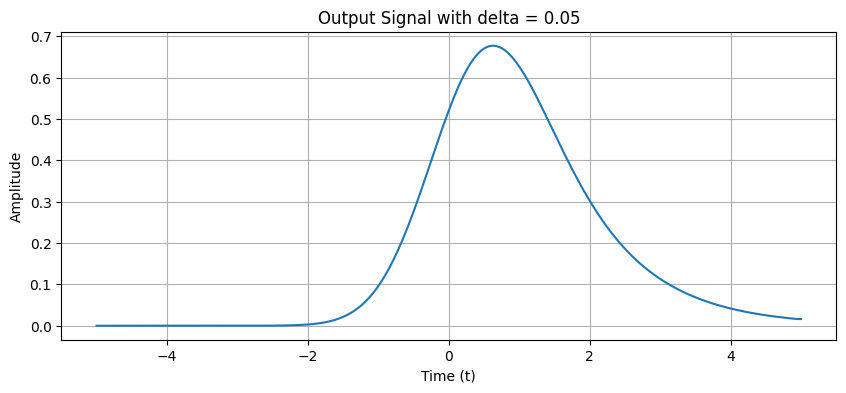

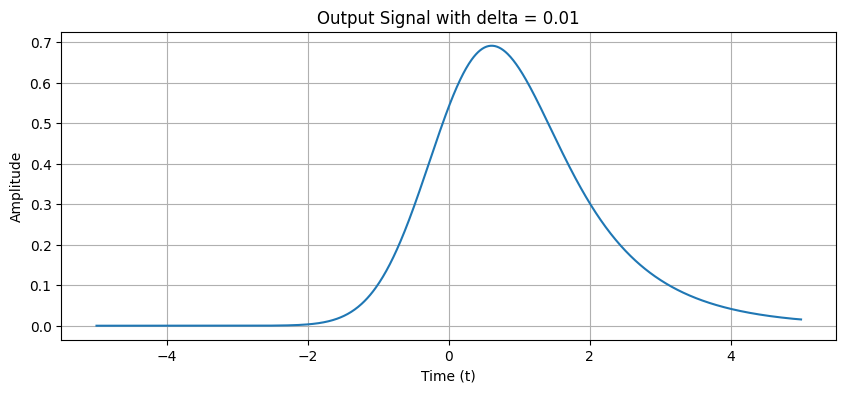

In [32]:
# import numpy as np
# import matplotlib.pyplot as plt

# class ContinuousSignal:
#     def __init__(self, func):
#         self.func = func

#     def shift(self, shift):
#         return ContinuousSignal(lambda t: self.func(t - shift))

#     def scale(self, factor):
#         return ContinuousSignal(lambda t: self.func(t) * factor)

#     def add(self, other):
#         return ContinuousSignal(lambda t: self.func(t) + other.func(t))

#     def plot(self, t_range, title="Signal", num_points=1000):
#         t = np.linspace(t_range[0], t_range[1], num_points)
#         plt.figure(figsize=(10, 4))
#         plt.plot(t, self.func(t), label='Signal')
#         plt.title(title)
#         plt.xlabel('Time (t)')
#         plt.ylabel('Amplitude')
#         plt.grid(True)
#         plt.show()

# class LTIContinuous:
#     def __init__(self, impulse_response):
#         self.impulse_response = impulse_response

#     def output_approx(self, input_signal, delta):
#         t_min, t_max = -5, 5  # Define the time range for simulation
#         t_values = np.arange(t_min, t_max, delta)
#         output_values = np.zeros_like(t_values)

#         # Calculate the output signal by convolution approximation
#         for idx, t in enumerate(t_values):
#             def impulse_product(tau):
#                 return input_signal.func(tau) * self.impulse_response.shift(-t).func(tau)

#             output_values[idx] = np.sum(impulse_product(t_values) * delta)

#         output_signal = ContinuousSignal(lambda t: np.interp(t, t_values, output_values))
#         return output_signal

# def main():
#     # Define the input signal
#     input_signal = ContinuousSignal(lambda t: np.exp(-t**2))  # Gaussian pulse

#     # Define the impulse response
#     impulse_response = ContinuousSignal(lambda t: np.exp(-t) * (t > 0))  # Exponential decay

#     # Create an LTI system
#     system = LTIContinuous(impulse_response)

#     # Generate output signal for different delta values
#     deltas = [0.5, 0.1, 0.05, 0.01]
#     for delta in deltas:
#         output_signal = system.output_approx(input_signal, delta)
#         output_signal.plot((-5, 5), title=f'Output Signal with delta = {delta}')

# if __name__ == "__main__":
#     main()


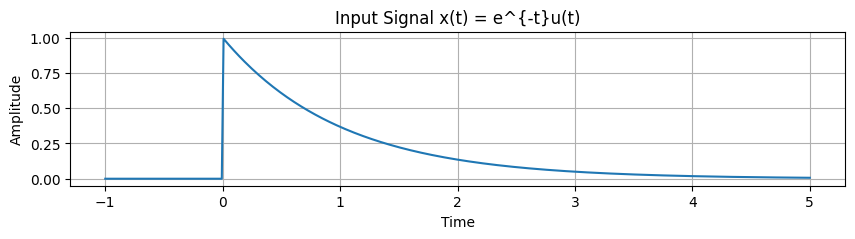

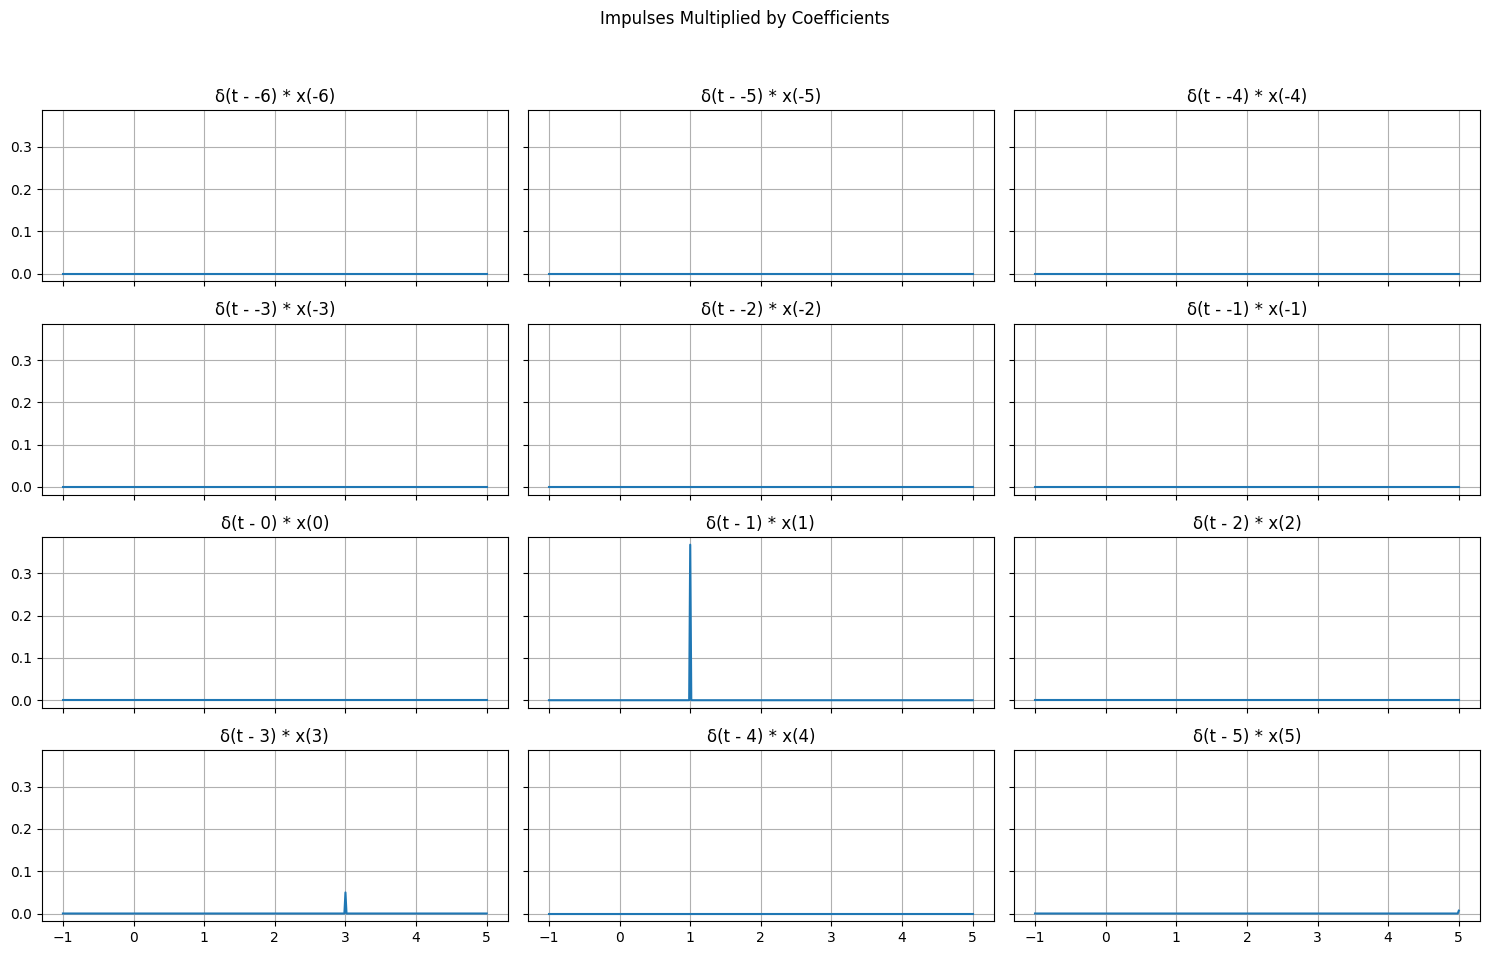

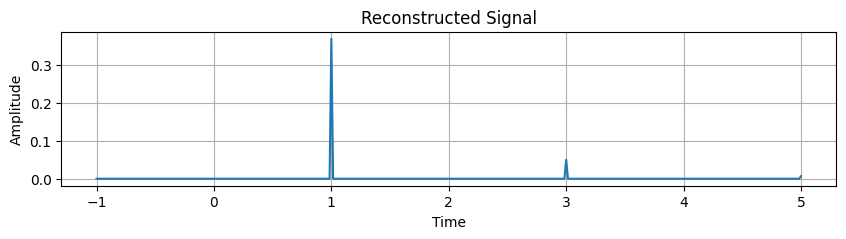

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define the continuous signal functions from the example
def input_signal(t):
    return np.exp(-t) * (t >= 0)

def impulse_response(t):
    return (t == 0).astype(float)

# Create a continuous time signal object
class ContinuousSignal:
    def __init__(self, func, label='Signal'):
        self.func = func
        self.label = label

    def plot(self, t_range, num_points=400):
        t = np.linspace(t_range[0], t_range[1], num_points)
        plt.figure(figsize=(10, 2))
        plt.plot(t, self.func(t))
        plt.title(f'{self.label}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()

    def multiply(self, other):
        return ContinuousSignal(lambda t: self.func(t) * other.func(t), 'Product of signals')

    def shift(self, tau):
        return ContinuousSignal(lambda t: self.func(t - tau), f'Shifted {self.label} by {tau}')

# Define the input and impulse response signals
x_t = ContinuousSignal(input_signal, 'Input Signal x(t) = e^{-t}u(t)')
h_t = ContinuousSignal(impulse_response, 'Impulse Response h(t) = δ(t)')

# Time range for plotting
time_range = (-1, 5)

# Plotting the input function x(t)
x_t.plot(time_range)

# Generate and plot the product of shifted impulses by their coefficients
coefficients = np.array([-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
shifts = coefficients
impulses = [x_t.multiply(h_t.shift(tau)) for tau in shifts]

# Creating subplots for impulses
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Impulses Multiplied by Coefficients')

for ax, impulse, coeff in zip(axes.flat, impulses, coefficients):
    t = np.linspace(time_range[0], time_range[1], 400)
    ax.plot(t, impulse.func(t))
    ax.set_title(f'δ(t - {coeff}) * x({coeff})')
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Reconstructing the overall signal by adding shifted and scaled impulses
reconstructed_signal = ContinuousSignal(lambda t: sum(impulse.func(t) for impulse in impulses), 'Reconstructed Signal')

# Plot the reconstructed signal
reconstructed_signal.plot(time_range)


<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\D'
/var/folders/zh/0p6yf5hj3kz0f5_st2ym0wr80000gn/T/ipykernel_36568/1821052733.py:27: SyntaxWarning: invalid escape sequence '\d'
  ax.set_title(f'$\delta(t - {shift}) \\times {coeff} \Delta$')
/var/folders/zh/0p6yf5hj3kz0f5_st2ym0wr80000gn/T/ipykernel_36568/1821052733.py:27: SyntaxWarning: invalid escape sequence '\D'
  ax.set_title(f'$\delta(t - {shift}) \\times {coeff} \Delta$')


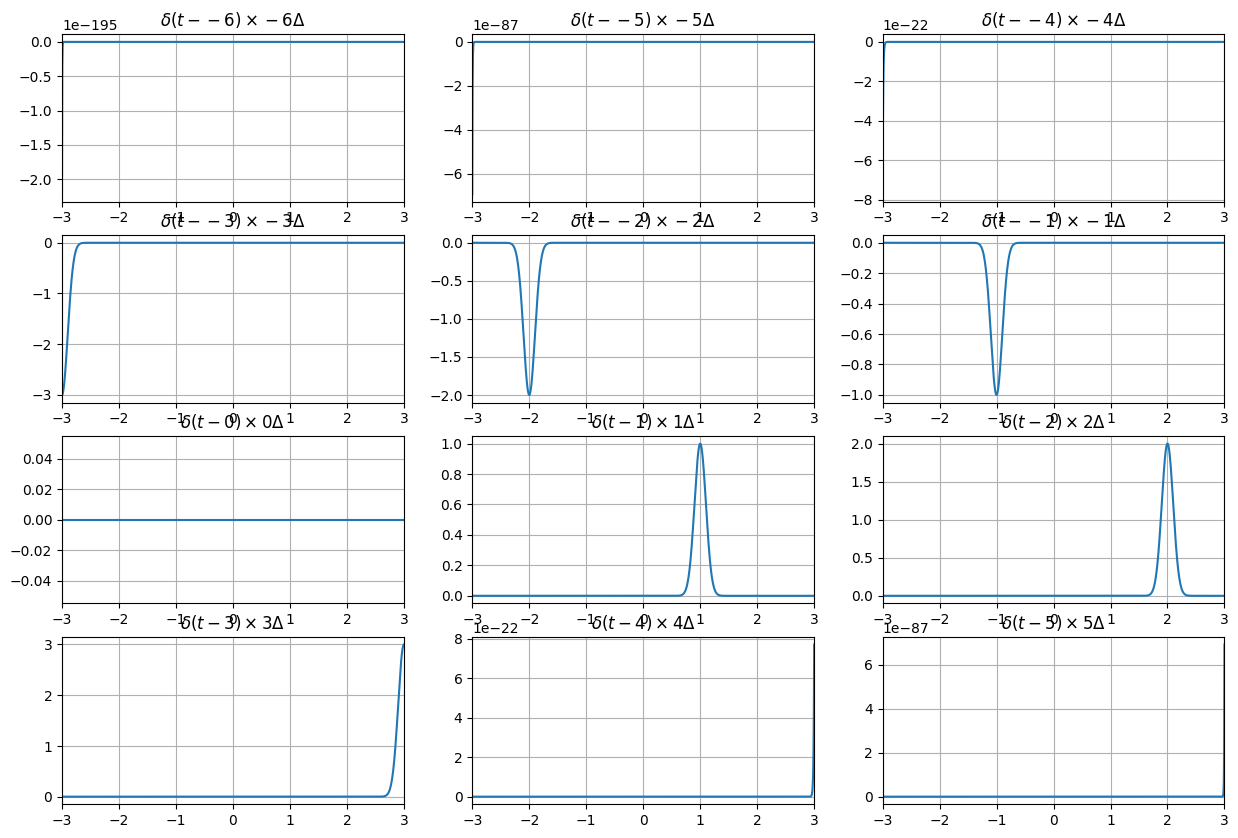

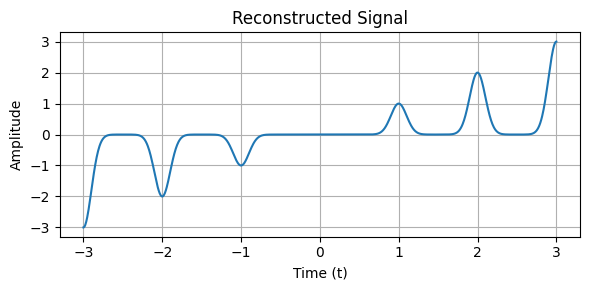

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def unit_step(t):
    return np.where(t >= 0, 1, 0)

def input_signal(t, a):
    return np.exp(-a * t) * unit_step(t)

# Approximate delta function using a narrow Gaussian
def delta(t, center, height, width=0.1):
    return height * np.exp(-(t-center)**2 / (2*width**2))

def main():
    a = 1  # Decay rate for the input signal
    t = np.linspace(-3, 3, 1000)  # Extended time vector for better visualization of impulses
    
    # Impulse coefficients and shifts
    coefficients = [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
    shifts = [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
    
    # Plotting all impulses multiplied by coefficients
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
    for ax, coeff, shift in zip(axes.flat, coefficients, shifts):
        impulse = delta(t, shift, coeff)
        ax.plot(t, impulse)
        ax.set_title(f'$\delta(t - {shift}) \\times {coeff} \Delta$')
        ax.set_xlim([-3, 3])
        ax.grid(True)
    
    # Compute and plot the reconstructed signal
    reconstructed_signal = np.sum([delta(t, shift, coeff) for coeff, shift in zip(coefficients, shifts)], axis=0)
    
    fig_reconstructed, ax_reconstructed = plt.subplots(figsize=(6, 3))
    ax_reconstructed.plot(t, reconstructed_signal, label='Reconstructed Signal')
    ax_reconstructed.set_title('Reconstructed Signal')
    ax_reconstructed.set_xlabel('Time (t)')
    ax_reconstructed.set_ylabel('Amplitude')
    ax_reconstructed.grid(True)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


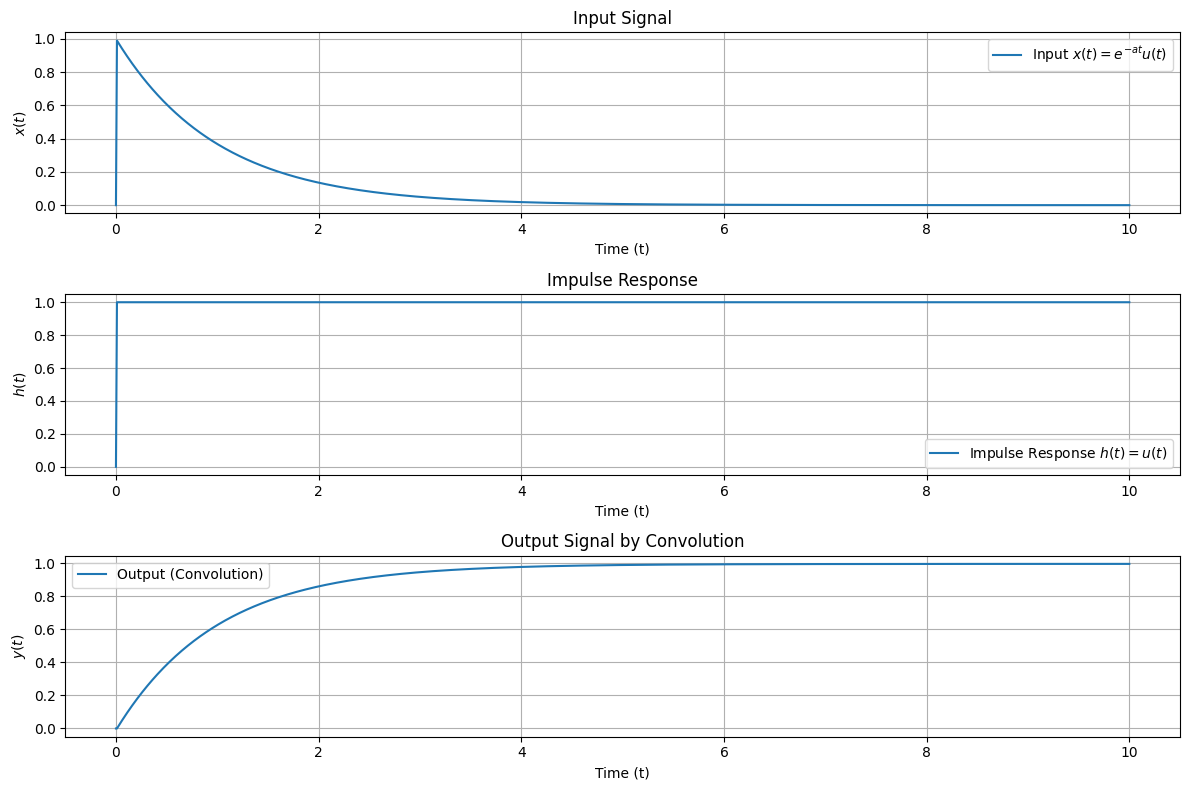

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def unit_step(t):
    return np.where(t > 0, 1, 0)

def input_signal(t, a):
    """ Exponential decay input signal """
    return np.exp(-a * t) * unit_step(t)

def impulse_response(t):
    """ Unit step function as impulse response """
    return unit_step(t)

def convolve_signals(input_sig, impulse_resp, t):
    """ Convolve input signal with the impulse response """
    dt = t[1] - t[0]  # Assume uniform spacing
    y_t = np.zeros_like(t)
    for i in range(len(t)):
        y_t[i] = np.sum(input_sig[:i+1] * impulse_resp[i::-1]) * dt
    return y_t

def delta_function(t, delta):
    return np.piecewise(t, [np.logical_and(t >= 0, t < delta)], [1/delta, 0])

def main():
    a = 1  # Decay constant for the input signal
    t = np.linspace(0, 10, 1001)  # Time vector from 0 to 10 seconds
    
    x_t = input_signal(t, a)
    h_t = impulse_response(t)
    
    # Convolve input signal with the impulse response to get the output signal
    y_t = convolve_signals(x_t, h_t, t)
    
    # Plotting the signals
    plt.figure(figsize=(12, 8))
    
    plt.subplot(3, 1, 1)
    plt.plot(t, x_t, label='Input $x(t) = e^{-at}u(t)$')
    plt.title('Input Signal')
    plt.xlabel('Time (t)')
    plt.ylabel('$x(t)$')
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(t, h_t, label='Impulse Response $h(t) = u(t)$')
    plt.title('Impulse Response')
    plt.xlabel('Time (t)')
    plt.ylabel('$h(t)$')
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(t, y_t, label='Output (Convolution)')
    plt.title('Output Signal by Convolution')
    plt.xlabel('Time (t)')
    plt.ylabel('$y(t)$')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


In [44]:
import numpy as np
import matplotlib.pyplot as plt
class DiscreteSignal:
    def __init__(self,INF):
        self.INF = INF
        self.values=np.zeros(2*INF+1)
    def set_value_at_time(self,time,value):
        if -self.INF<=time<=self.INF:
            self.values[time+self.INF]=value
        else:
            raise ValueError("Index out of range")
        
    def shift_signal(self,shift):
        shifted_signal=DiscreteSignal(self.INF)
        for i in range(-self.INF,self.INF+1):
            shifted_index=i-shift
            if -self.INF<=shifted_index<=self.INF:
                shifted_signal.set_value_at_time(i,self.values[shifted_index+self.INF])
        return shifted_signal
    
    def add(self,other):
        if self.INF!=other.INF:
            raise ValueError("INF values do not match")
        new_signal=DiscreteSignal(self.INF)
        new_signal.values=self.values+other.values
        return new_signal
    def multiply(self,other):
        if self.INF!=other.INF:
            raise ValueError("INF values do not match")
        new_signal=DiscreteSignal(self.INF)
        new_signal.values=self.values*other.values
        return new_signal
    
    def multiply_const_factor(self,scaler):
        new_signal=DiscreteSignal(self.INF)
        new_signal.values=self.values*scaler
        return new_signal
    
    def plot(self):
        time = np.arange(-self.INF, self.INF+1)
        plt.stem(time, self.values)
        plt.xlabel('Time index (n)')
        plt.ylabel('Signal value')
        plt.title('Discrete Signal')
        plt.grid(True)
        plt.show()
        
    


import numpy as np
import matplotlib.pyplot as plt
class ContinuousSignal:
    def __init__(self,func):
        self.func=func
    
    def shift(self,shift):
        return ContinuousSignal(lambda t:self.func(t-shift))
    
    def add(self,other):
        return ContinuousSignal(lambda t:self.func(t)+other.func(t))
    
    def multiply(self,other):
        return ContinuousSignal(lambda t:self.func(t)*other.func(t))
    
    def multiply_const_factor(self,scaler):
        return ContinuousSignal(lambda t:self.func(t)*scaler)
    
    def plot(self,t_range=(-10,10),numpoints=1000,title="Continuous Signal"):
        t = np.linspace(t_range[0], t_range[1], numpoints)
        y_values = self.func(t)
        plt.plot(t, y_values)
        plt.xlabel('Time (t)')
        plt.ylabel('Signal x(t)')
        plt.title(title)
        plt.grid(True)
        plt.show()



import numpy as np

class LTI_Discrete:
    def __init__(self, impulse_response):
        """
        Initializes the LTI Discrete system with a given impulse response.
        
        :param impulse_response: An instance of DiscreteSignal representing the system's impulse response.
        """
        self.impulse_response = impulse_response

    def linear_combination_of_impulses(self, input_signal):
        """
        Decomposes the input signal into a linear combination of unit impulses.
        
        :param input_signal: The input discrete signal.
        :return: The unit impulses and their coefficients.
        """
        impulses = []
        coefficients = []
        for i, value in enumerate(input_signal.values):
            if value != 0:
                shift=i-self.impulse_response.INF
                # unit_impulse=DiscreteSignal(input_signal.INF)
                # unit_impulse.set_value_at_time(0,1)
                # impulses.append(self.unit_impulse.shift_signal(shift))
                #impulses.append(i)
                impulses.append(self.impulse_response.shift_signal(shift))
                coefficients.append(value)
        return impulses, coefficients

    def output(self, input_signal):
        """
        Finds the output of the LTI system using its impulse response and input signal.
        
        :param input_signal: The input discrete signal.
        :return: The output discrete signal.
        """
        # impulses, coefficients = self.linear_combination_of_impulses(input_signal)
        # output_signal = DiscreteSignal(self.impulse_response.INF)#np.zeros_like(input_signal.values)
        # for i, coeff in zip(impulses, coefficients):
        #     shifted_impulse_response = shifted_impulse_response.shift_signal(i)
        #     output_signal += coeff * shifted_impulse_response
        # return output_signal
        
        output_signal = DiscreteSignal(self.impulse_response.INF)
        impulses, coefficients = self.linear_combination_of_impulses(input_signal)
        for impulse, coeff in zip(impulses, coefficients):
            scaled_impulse = impulse.multiply_const_factor(coeff)
            output_signal = output_signal.add(scaled_impulse)
        return output_signal


        
        
    
import numpy as np

class LTI_Continuous:
    def __init__(self, impulse_response):
        """
        Initializes the LTI Continuous system with a given continuous-time impulse response.
        
        :param impulse_response: An instance of ContinuousSignal representing the system's impulse response.
        """
        self.impulse_response = impulse_response

    def linear_combination_of_impulses(self, input_signal, delta):
        """
        Decomposes the input continuous signal into a linear combination of impulses of width delta.
        
        :param input_signal: The input continuous signal.
        :param delta: The width of each impulse.
        :return: The impulses and their coefficients.
        """
        t_values = np.arange(-10, 10, delta)  # Sample time values
        coefficient = np.zeros_like(t_values)
        for i, t in enumerate(t_values):
            coefficient[i] = input_signal.func(t) * delta
        return t_values, coefficient

    def output_approx(self, input_signal, delta):
        """
        Approximates the output of the system by first decomposing the input, then using the impulse response.
        
        :param input_signal: The input continuous signal.
        :param delta: The width of the impulses.
        :return: The approximated output continuous signal.
        """
        output_responses = []
        t_values, coefficients = self.linear_combination_of_impulses(input_signal, delta)
        output_signal = np.zeros_like(t_values)
        for i, coeff in enumerate(coefficients):
            shifted_impulse_response = self.impulse_response.func(t_values - t_values[i])
            output_responses.append(coeff*shifted_impulse_response)
            output_signal += coeff * shifted_impulse_response
        return output_signal,output_responses
    
    

    
    


In [45]:
import numpy as np

def polynomial_multiplication():
    # Input for the first polynomial
    d1 = int(input("Degree of the first polynomial: "))
    poly1 = list(map(int, input("Coefficients: ").split()))
    
    # Input for the second polynomial
    d2 = int(input("Degree of the second polynomial: "))
    poly2 = list(map(int, input("Coefficients: ").split()))
    
    # Multiply the polynomials using discrete-time convolution
    result = np.convolve(poly1, poly2)
    
    # Print the result
    degree = len(result) - 1
    print("Degree of the Polynomial:", degree)
    print("Coefficients:", ' '.join(map(str, result)))

# Call the function to execute the polynomial multiplication
polynomial_multiplication()




#
def polynomial_multiplication():
    # Input for first polynomial
    d1 = int(input("Degree of the first polynomial: "))
    poly1 = list(map(int, input("Coefficients: ").split()))

    # Input for second polynomial
    d2 = int(input("Degree of the second polynomial: "))
    poly2 = list(map(int, input("Coefficients: ").split()))

    # Create DiscreteSignal instances
    signal1 = DiscreteSignal(np.array(poly1))
    signal2 = DiscreteSignal(np.array(poly2))

    # Create LTI system with the second polynomial as the impulse response
    lti_system = LTI_Discrete(signal2)

    # Get the output signal which is the convolution of the two polynomials
    result_signal = lti_system.output(signal1)

    # Print the result
    result_degree = len(result_signal.values) - 1
    print("Degree of the Polynomial:", result_degree)
    print("Coefficients:", ' '.join(map(str, result_signal.values.astype(int))))

# Call the function to perform polynomial multiplication
polynomial_multiplication()



ValueError: invalid literal for int() with base 10: ''

In [ ]:
import numpy as np

class DiscreteSignal:
    def __init__(self, values):
        self.values = values

    def shift_signal(self, shift):
        length = len(self.values)
        shifted_values = np.zeros(length + abs(shift))
        if shift >= 0:
            shifted_values[shift:shift + length] = self.values
        else:
            shifted_values[:length + shift] = self.values[-shift:]
        return DiscreteSignal(shifted_values)

    def add(self, other):
        max_length = max(len(self.values), len(other.values))
        padded_self = np.pad(self.values, (0, max_length - len(self.values)), 'constant')
        padded_other = np.pad(other.values, (0, max_length - len(other.values)), 'constant')
        return DiscreteSignal(padded_self + padded_other)

    def multiply_const_factor(self, scaler):
        return DiscreteSignal(self.values * scaler)

class LTI_Discrete:
    def __init__(self, impulse_response):
        self.impulse_response = impulse_response

    def output(self, input_signal):
        result_length = len(input_signal.values) + len(self.impulse_response.values) - 1
        result = np.zeros(result_length)
        for i, x in enumerate(input_signal.values):
            shifted = self.impulse_response.shift_signal(i)
            result = result + shifted.multiply_const_factor(x).values
        return DiscreteSignal(result)
